## 1. Import Libraries for Classifying Data with Algorithms and Load Dataset after Preprocessing Steps

In [1]:
"""
Meng-import beberapa library dari bahasa pemrograman python yang bertujuan untuk melakukan
tahap pembagian data menjadi training dan testing, normalisasi data serta pemodelan dengan beberapa Algoritma Machine Learning
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fast")
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier, VotingClassifier # Dua library untuk pemodelan dengan teknik Ensemble
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [2]:
# Memanggil file dataset yang telah dilakukan proses preprocessing dan disimpan di dalam variabel DataFrame baru
data_modelling = pd.read_csv("../Dataset/Patient Treatment Data after Preprocessed.csv")

data_modelling.head(13)

,Hematocrit,Hemoglobin,Erythrocyte,Leucocyte,Thrombocyte,Mch,Mchc,Mcv,Age,Sex,Status
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,1
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,1
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,1
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,1
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,1
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,1,1
6,31.1,8.7,5.06,11.1,416,17.2,28.0,61.5,1,0,1
7,40.3,13.3,4.73,8.1,257,28.1,33.0,85.2,1,0,1
8,33.6,11.5,4.54,11.4,262,25.3,34.2,74.0,1,0,1
9,35.4,11.4,4.80,2.6,183,23.8,32.2,73.8,1,0,1


## 2. Split the Data into Training and Testing then Create Normalization Data

Sebelum melakukan pemodelan dengan beberapa Algoritma Machine Learning (Regresi Logistik, Decision Tree, SVM, KNN, Naive Bayes, Ensemble Stacking dan Ensemble Vote), saya akan melakukan sedikit data pre-processing yaitu mlakukan penyeleksian kolom data yang akan dijadikan sebagai variabel independen/variabel x dan variabel dependen/variabel y serta melakukan tahap split validation yang dimana nantinya keutuhan data di dalam variabel DataFrame data_modelling akan terbagi menjadi 2 jenis data yaitu data training dan data testing yang kemudian data-data tersebut akan dinormalisasikan/diskalakan dengan salah satu teknik feature scaling yaitu StandardScaler.

Kolom-kolom yang akan menjadi variabel independen/variabel x adalah kolom "Hematocrit", "Hemoglobin", "Erythrocyte", "Leucocyte", "Thrombocyte", "Mch", "Mchc", "Mcv", "Age" dan "Sex". Sedangkan kolom yang akan menjadi variabel dependen/variabel y adalah kolom "Status" yang merupakan kolom label output dengan 2 data unik yaitu 0 (pasien rawat inap) dan 1 (pasien rawat jalan).

In [3]:
# Melakukan penyeleksian kolom data dari variabel DataFrame data_modelling menjadi variabel x dan variabel y
x = data_modelling.drop(["Status"], axis=1)

y = data_modelling["Status"]

In [4]:
# Menampilkan data-data yang ada di dalam variabel independen/variabel x sebanyak 7 data teratas
x.head(7)

,Hematocrit,Hemoglobin,Erythrocyte,Leucocyte,Thrombocyte,Mch,Mchc,Mcv,Age,Sex
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,1
6,31.1,8.7,5.06,11.1,416,17.2,28.0,61.5,1,0


In [5]:
# Menampilkan jumlah data yang dimiliki oleh variabel independen (x) sebelum dilakukan proses split
print("Jumlah Data yang ada Didalam Variabel Independen (Variabel X) adalah", len(x))

Jumlah Data yang ada Didalam Variabel Independen (Variabel X) adalah 4412


In [6]:
# Menampilkan data-data yang ada di dalam variabel dependen/variabel y sebanyak 53 data terbawah
y.tail(53)

4359    0
4360    0
4361    0
4362    1
4363    1
4364    1
4365    1
4366    1
4367    0
4368    0
4369    0
4370    0
4371    0
4372    0
4373    1
4374    1
4375    0
4376    0
4377    0
4378    0
4379    0
4380    0
4381    0
4382    1
4383    1
4384    0
4385    0
4386    0
4387    0
4388    0
4389    0
4390    0
4391    0
4392    0
4393    0
4394    1
4395    1
4396    0
4397    1
4398    0
4399    1
4400    1
4401    1
4402    1
4403    0
4404    0
4405    0
4406    0
4407    0
4408    0
4409    1
4410    0
4411    1
Name: Status, dtype: int64

In [7]:
# Menampilkan jumlah data yang dimiliki oleh variabel dependen (x) sebelum dilakukan proses split
print("Jumlah Data yang ada Didalam Variabel Dependen (Variabel Y) adalah", len(y))

Jumlah Data yang ada Didalam Variabel Dependen (Variabel Y) adalah 4412


Walaupun keutuhan data dari variabel DataFrame data_modelling telah terkelompok menjadi 2 bagian yang dimana 10 kolom ada di dalam variabel independen (variabel x) dan 1 kolom ada di dalam variabel dependen (variabel y), tetapi jumlah data yang dimiliki tetaplah sama yaitu 4.412. Jumlah data tersebut tidak mengalami penurunan/penambahan sebab pada saat di tahapan data preprocessing, saya tidak mengurangi jumlah data ataupun menambahnya.

Selain itu, jumlah data tersebut (4.412) akan terbagi ke dalam 4 kategori variabel yaitu variabel independen (x) yang bertugas untuk melatih (training) Algoritma Machine Learning, variabel independen (x) tetapi bertugas untuk menguji (testing) algoritma. Lalu juga terdapat variabel dependen (y) yang bertujuan untuk melatih (training) Algoritma Machine Learning dengan data-data yang nantinya akan dikenali dan variabel dependen (y) yang bertujuan untuk menguji (testing) algoritma yang sebelumnya sudah dilatih dengan diberikan data-data baru yang belum dikenali.

In [8]:
"""
Membagi variabel independen dan dependen menjadi 2 jenis data yaitu data training (train) dan data testing (test). Proses
membagi data di kedua variabel ini memanfaatkan teknik split data dengan metode Split Validation.
Split validation merupakan salah satu teknik validasi yang membagi dataset menjadi 2 bagian data yaitu data training
dan data testing dengan nilai proporsi yang ditentukan seperti 30 untuk data testing dan 70 untuk data training,
20 untuk data testing dan 80 untuk data training, atau 40 untuk data testing dan 60 untuk data training.
"""

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=38)

Berikut adalah penjelasan dari proses split validation:

1. x: Merupakan sebuah variabel independen atau variabel yang mempengaruhi/menjadi sebab utama dalam perubahan dari variabel dependen. Dalam pengujian kali ini, kolom-kolom yang mempengaruhi variabel y/variabel dependen adalah kolom "Hematocrit", "Hemoglobin", "Erythrocyte", "Leucocyte", "Thrombocyte", "Mch", "Mchc", "Mcv", "Age" dan "Sex".
2. y: Merupakan sebuah variabel dependen atau variabel yang dipengaruhi variabel independen/variabel x. Berubahnya data yang ada di dalam variabel dependen adalah disebabkan karena berubahnya data di variabel independen/variabel x. Variabel y juga biasa dikenal sebagai label prediksi/label output jika permasalahannya adalah mengklasifikasikan data. Dalam pengujian ini, label outputnya adalah kolom "Status".
3. test_size: Nilai presentase atau nilai proporsi dalam pembagian data menjadi data training dan data testing. Dalam pengujian ini saya memakai nilai presentase test_size sebesar 0.2 yang dimana ukuran dari data test mencapai 20% dan data train mencapai 80%.
4. random_state: Fungsi ini berfungsi untuk menetapkan nilai supaya ketika setiap kali codingan dijalankan maka nilai yang ada di data training dan data testing akan selalu tetap dan nilainya dan tidak berubah-ubah sedangkan jika di proses split validation ini tidak menetapkan nilai random_state maka setiap codingan dijalankan maka nilai baru akan teracak kembali di data training dan data testing sehingga akan memiliki nilai yang berbeda-beda setiap saat codingan dijalankan. Dalam menetapkan nilai random_state tidak ada ketentuan nilai yang pasti (bebas menentukan nilai bilangan bulat) namun dalam pengujian ini saya menetapkan nilai 38 di random_state.


Selain keempat penjelasan tersebut terdapat juga variabel baru seperti x_train, x_test, y_train, dan y_test. Berikut adalah penjelasannya:

1. x_train: Merupakan data training/data yang akan melatih menggunakan model machine learning. Variabel x_train terdiri dari variabel independen (variabel x).
2. x_test: Merupakan data testing atau data yang akan mengetahui performa model yang telah dilatih dengan data training. Variabel x_test terdiri dari variabel independen (variabel x).
3. y_train: Merupakan data training atau data yang akan melatih menggunakan model machine learning. Perbedaan dengan x_train yaitu variabel y_train terdiri dari variabel dependen (variabel y).
4. y_test: Merupakan data testing atau data yang akan mengetahui performa model yang telah dilatih dengan data training. Sama seperti pada variabel y_train, variabel y_test sudah pasti berbeda dengan variabel x_test karena variabel ini, variabel y_test, terdiri dari variabel dependen (variabel y).

In [9]:
"""
Melihat ukuran jumlah data dan kolom yang dimiliki oleh data training
(baik data training dari variabel independen atau variabel dependen)
serta data testing (baik data testing dari variabel independen ataupun variabel dependen)
"""
print("Jumlah Data dan Kolom di Data Training setelah Dilakukan Proses Split Validation: ", x_train.shape, y_train.shape)
print("Jumlah Data dan Kolom di Data Testing setelah Dilakukan Proses Split Validation: ", x_test.shape, y_test.shape)

Jumlah Data dan Kolom di Data Training setelah Dilakukan Proses Split Validation:  (3529, 10) (3529,)
Jumlah Data dan Kolom di Data Testing setelah Dilakukan Proses Split Validation:  (883, 10) (883,)


Penjelasan dari hasil diatas:

- Total data yang ada di dalam variabel DataFrame data_modelling ataupun variabel independen & dependen sebanyak 4.412 data.

- Sedangkan nilai persentase saat melakukan proses split data menjadi data training dan data testing adalah sebesar 20% => 0.2.

Jadi nilai yang diberikan ke data testing didapatkan dari perhitungan dari: 4.412 - 20% = 882.4 yang jika dibulatkan menjadi nilai 883.

Sedangkan nilai yang diberikan ke data training adalah hasil dari pengurangan antara total data yang ada di dalam data_modelling yaitu 3.529 dengan jumlah data yang ada di dalam data testing sebanyak 883 data yang nantinya bertugas untuk menguji algoritma yang sudah mempelajari data-data dari data training.

Jadi jika dikurangkan antara total data yang ada di dalam variabel DataFrame data_modelling (4.412) dengan jumlah data yang saat ini dimiliki oleh data testing (882), maka hasilnya adalah 3.529. Jumlah tersebut (3.529) akan digunakan oleh data training untuk melatih/mengajari beberapa Algoritma Machine Learning yang digunakan di dalam eksperimen ini.

In [10]:
# Menampilkan kumpulan data training dari variabel independen (variabel x) dan variabel dependen (variabel y)
print("Kumpulan Data untuk Melatih Algoritma Machine Learning (Data Training) dari Variabel Independen: ")
print(x_train, "\n")

print("Kumpulan Data untuk Melatih Algoritma Machine Learning (Data Training) dari Variabel Dependen: ")
print(y_train)

Kumpulan Data untuk Melatih Algoritma Machine Learning (Data Training) dari Variabel Independen: 
      Hematocrit  Hemoglobin  Erythrocyte  Leucocyte  Thrombocyte   Mch  Mchc  \
1442        40.4        13.5         4.44        4.4          184  30.4  33.4   
263         38.6        13.1         4.90       10.0          286  26.7  33.9   
2526        32.3        10.5         4.03       13.2          231  26.1  32.5   
89          30.1        10.1         3.93        6.5          236  25.7  33.6   
233         38.8        12.9         4.89       10.2          239  26.4  33.2   
...          ...         ...          ...        ...          ...   ...   ...   
862         43.2        14.9         5.82        8.1          342  25.6  34.5   
1884        39.1        13.5         4.87       13.5          319  27.7  34.5   
2785        39.4        13.7         4.45        6.2          210  30.8  34.8   
4149        40.3        13.9         4.33       10.8          285  32.1  34.5   
3915       

In [11]:
# Menampilkan kumpulan data testing dari variabel independen (variabel x) dan variabel dependen (variabel y)
print("Kumpulan Data Baru untuk Menguji Algoritma Machine Learning (Data Testing) dari Variabel Independen: ")
print(x_test, "\n")

print("Kumpulan Data Baru untuk Menguji Algoritma Machine Learning (Data Testing) dari Variabel Dependen: ")
print(y_test)

Kumpulan Data Baru untuk Menguji Algoritma Machine Learning (Data Testing) dari Variabel Independen: 
      Hematocrit  Hemoglobin  Erythrocyte  Leucocyte  Thrombocyte   Mch  Mchc  \
3105        33.4        11.0         3.79        8.2          334  29.0  32.9   
3096        42.1        14.0         4.31        6.2          209  32.5  33.3   
3315        30.8        10.9         3.45        9.2          121  31.6  35.4   
1296        43.9        14.4         5.34        9.1          320  27.0  32.8   
2059        28.0         8.7         3.26        1.1           28  26.7  31.1   
...          ...         ...          ...        ...          ...   ...   ...   
697         38.3        12.5         4.42        8.0          349  28.3  32.6   
1547        40.2        13.7         4.62       15.2          292  29.7  34.1   
2858        39.1        12.7         4.19       13.0          619  30.3  32.5   
3320        30.1        10.0         3.32       10.5          150  30.1  33.2   
1232   

In [12]:
# Melakukan proses normalisasi/penskalaan nilai data untuk training & testing dengan fungsi StandardScaler

standardscaler = StandardScaler()

x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.fit_transform(x_test)

StandardScaler merupakan sebuah proses penskalaan data dengan mengurangi nilai mean/rata-rata dan kemudian nilai tersebut akan diskalakan ke dalam varians unit. Maksud dari varians unit adalah membagi keseluruhan nilai data dengan standar deviasi. Maka dari itu fungsi dari StandardScaler akan mengubah ukuran distribusi nilai rata-rata menjadi 0 dan nilai standar deviasi menjadi 1.

Referensi:

- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=StandardScaler,-StandardScaler%20is%20the&text=StandardScaler%20standardizes%20a%20feature%20by,of%20scale%20I%20introduced%20earlier.

- https://thecleverprogrammer.com/2020/09/22/standardscaler-in-machine-learning/

In [13]:
# Melihat hasil data (baik dari data training atau testing) yang telah dinormalisasikan dengan fungsi StandardScaler
print("-----------------Hasil dari Data Training setelah Proses Normalisasi dengan StandardScaler-----------------")
print(x_train, "\n")

print("-----------------Hasil dari Data Testing setelah Proses Normalisasi dengan StandardScaler-----------------")
print(x_test, "\n")

-----------------Hasil dari Data Training setelah Proses Normalisasi dengan StandardScaler-----------------
[[ 0.37685587  0.37030089 -0.12224026 ...  0.92424944 -0.52794281
  -1.0255458 ]
 [ 0.07385814  0.1777788   0.46731232 ... -0.85251653 -1.63091875
  -1.0255458 ]
 [-0.98663392 -1.07361481 -0.64771103 ... -0.66318901  0.29928914
  -1.0255458 ]
 ...
 [ 0.2085238   0.46656193 -0.1094239  ...  0.56015806  0.48311846
   0.97509053]
 [ 0.36002266  0.56282298 -0.26322022 ...  1.23008621  1.49417974
   0.97509053]
 [-1.4074641  -1.21800638 -1.45514173 ...  0.42908516  1.26439308
   0.97509053]] 

-----------------Hasil dari Data Testing setelah Proses Normalisasi dengan StandardScaler-----------------
[[-0.80987631 -0.85581291 -0.97042487 ...  0.53492574  0.6398396
  -1.09385438]
 [ 0.61545033  0.58166626 -0.31910597 ...  1.9418319   0.6398396
  -1.09385438]
 [-1.23583599 -0.90372888 -1.39628722 ...  0.71078901  0.77874593
   0.91419847]
 ...
 [ 0.12395839 -0.04124138 -0.46941033 ...  1.

## 3. Modelling with Machine Learning Algorithms

### 3.1. Logistic Regression

In [14]:
"""
Memanggil algoritma Regresi Logistik dari library sklearn yang sebelumnya library dari Algoritma Regresi Logistik
telah didefinisikan pada tahap Import Libraries. Nantinya Regresi Logistik akan dilatih menggunakan data training.
Selain itu, pada tahapan ini juga akan mencari nilai terbaik dari beberapa
hyperparameters (kita sebut sebagai proses tuning hyperparameters) milik Regresi Logistik.
Untuk membantu dalam mencari the best value per parameter dengan tuning,
saya akan menggunakan sebuah teknik validasi parameter algoritma yang bernama GridSearchCV
"""

logistic_regression_algo = LogisticRegression()

parameters_logistic_regression = {
    "penalty": ["l1", "l2"],
    "dual": [True, False],
    "tol": [1.2, 5.3, 7.8, 3.6, 2.6, 3.0, 7.3, 9.9, 2.2, 5.4],
    "solver": ["newton-cg", "liblinear"],
    "max_iter": [30, 29, 67, 45, 77, 38, 53, 66, 79, 84],
    "random_state": [40, 58, 32, 27, 23, 38, 46, 51, 78, 64]
}

grid_search_logistic_regression = GridSearchCV(logistic_regression_algo, parameters_logistic_regression)
grid_search_logistic_regression.fit(x_train, y_train)

# Melihat nilai terbaik dari parameter-parameter yang telah didefinisikan di dalam variabel parameters_logistic_regression
print("Nilai Terbaik dari Parameter penalty adalah: ", 
      grid_search_logistic_regression.best_estimator_.get_params()["penalty"])
print("Nilai Terbaik dari Parameter dual adalah: ",
      grid_search_logistic_regression.best_estimator_.get_params()["dual"])
print("Nilai Terbaik dari Parameter tol adalah: ", 
      grid_search_logistic_regression.best_estimator_.get_params()["tol"])
print("Nilai Terbaik dari Parameter solver adalah: ",
      grid_search_logistic_regression.best_estimator_.get_params()["solver"])
print("Nilai Terbaik dari Parameter max_iter adalah: ",
      grid_search_logistic_regression.best_estimator_.get_params()["max_iter"])
print("Nilai Terbaik dari Parameter random_state adalah: ",
      grid_search_logistic_regression.best_estimator_.get_params()["random_state"])

Nilai Terbaik dari Parameter penalty adalah:  l2
Nilai Terbaik dari Parameter dual adalah:  True
Nilai Terbaik dari Parameter tol adalah:  1.2
Nilai Terbaik dari Parameter solver adalah:  liblinear
Nilai Terbaik dari Parameter max_iter adalah:  67
Nilai Terbaik dari Parameter random_state adalah:  23


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter di Algoritma Regresi Logistik maka didapatkan beberapa kesimpulan diantaranya:

1. Dari kedua argumen pada parameter penalty (l1 dan l2) yang didefinisikan pada variabel parameters_logistic_regression didapatkan sebuah argumen parameter yang paling baik dan cocok untuk digunakan dalam melatih algoritma yaitu penalty l2.
2. Dari nilai boolean (True dan False) pada parameter dual, argumen True merupakan argumen yang menghasilkan performa yang sangat bagus dalam melatih Algoritma Regresi Logistik.
3. Parameter tol yang didefinisikan di dalam variabel parameters_logistic_regression menghasilkan nilai paling cocok dalam melatih Regresi Logistik yaitu 1.2.
4. Dari kedua argumen pada parameter solver yang didefinisikan pada variabel parameters_logistic_regression didapatkan sebuah argumen parameter yang paling baik dan tepat untuk digunakan selama melatih Regresi Logistik. Nilai dari parameter solver tersebut adalah liblinear.
5. Parameter max_iter yang didefinisikan di dalam variabel parameters_logistic_regression menghasilkan nilai paling cocok dalam melatih Regresi Logistik yaitu 67.
6. Parameter Regresi Logistik terakhir yang didefinisikan di dalam variabel parameters_logistic_regression adalah random_state yang menghasilkan nilai yaitu 23.

Pada proses tuning hyperparameters atau dapat dikatakan sebagai proses pencarian nilai terbaik di dalam parameter-parameter dari suatu algoritma yang didefisinikan, Algoritma Regresi Logistik, saya juga menggunakan sebuah fungsi yang bernama GridSearchCV. GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari atau memvalidasi sebuah nilai terbaik (the best value in each parameters) dengan otomatis untuk setiap parameter-parameter dari Algoritma Machine Learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

- https://www.mygreatlearning.com/blog/gridsearchcv/

- https://algotech.netlify.app/blog/gridsearchcv/#:~:text=GridSearchCV%20merupakan%20bagian%20dari%20modul,masing%20secara%20otomatis%20dan%20sistematis.

- https://medium.com/@adiptamartulandi/tuning-hyperparameters-logistic-regression-menggunakan-grid-search-ucupstory-fb1ab9db082a

In [15]:
"""
Melihat hasil prediksi dengan data testing setelah dilakukan proses tunning hyperparameter
sekaligus melatih Algoritma Regresi Logistik itu sendiri
"""
print("----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Regresi Logistik menggunakan Data Training----------")
pred_logistic_regression = grid_search_logistic_regression.predict(x_test)
print(pred_logistic_regression)

----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Regresi Logistik menggunakan Data Training----------
[1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 

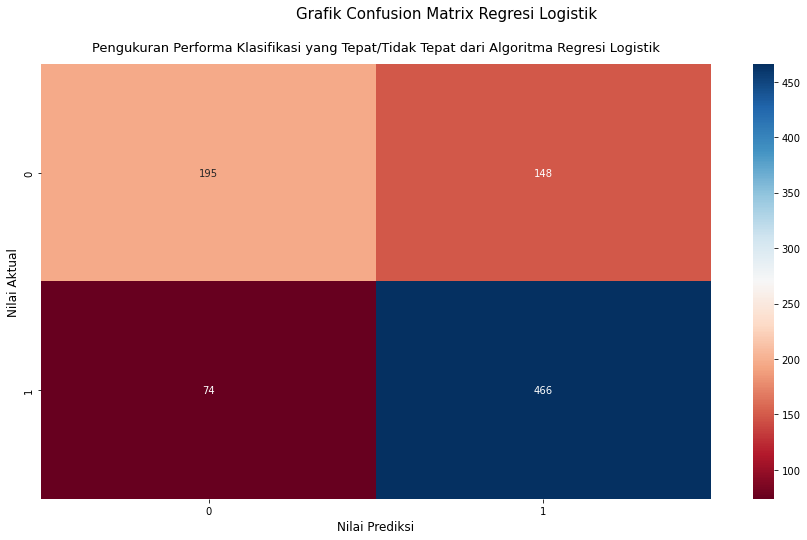

In [16]:
# Pengukuran performa pada Algoritma Regresi Logistik menggunakan hasil prediksi dari data testing
plt.figure(figsize=(15, 8))

sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, cmap="RdBu", fmt=".0f")
plt.xlabel("Nilai Prediksi", fontsize=12)
plt.ylabel("Nilai Aktual", fontsize=12)
plt.suptitle("Grafik Confusion Matrix Regresi Logistik", fontsize=15)
plt.title("Pengukuran Performa Klasifikasi yang Tepat/Tidak Tepat dari Algoritma Regresi Logistik",
          fontsize=13, pad=13, loc="center")
plt.savefig("../Data Visualization/Confusion Matrix/Confusion Matrix untuk Algoritma Regresi Logistik.png")
plt.show()

Berikut adalah penjelasan dari grafik confusion matrix berdasarkan pelatihan sekaligus pengujian dengan Algoritma Regresi Logistik yang telah dilatih dengan data training ataupun data testing. Hasil tersebut merupakan hasil klasifikasi/prediksi yang dilakukan oleh data testing yang dimana data testing berfungsi untuk menguji Regresi Logistik karena sebelumnya algoritma tersebut sudah dilatih dengan data training. Berikut adalah penjelasan dari nilai-nilai pada grafik confusion matrix diatas:

1. Nilai 195 menunjukkan bahwa nilai tersebut adalah TRUE NEGATIVE (TN) yang merupakan data negatif yang berhasil di klasifikasikan dengan benar.
2. Nilai 466 menunjukkan bahwa nilai ini adalah TRUE POSITIVE (TP) yang merupakan data positif yang berhasil di klasifikasikan dengan benar.
3. Nilai 148 menunjukkan bahwa nilai tersebut merupakan FALSE POSITIVE (FP) yang merupakan data negatif namun diklasifikasikan/diprediksi sebagai hasil dari nilai yang positif.
4. Terakhir adalah nilai 74 yang menunjukkan bahwa nilai tersebut adalah FALSE NEGATIVE (FN) yang merupakan data positif namun diklasifikasikan/diprediksi sebagai hasil/output dari nilai negatif.


Sebagai catatan bahwa nilai 0 dan 1, baik yang ada di sumbu x (Nilai Prediksi) dan sumbu y (Nilai Aktual) adalah nilai negatif dan positif. Nilai negatif ditandai dengan angka 0 sedangkan nilai positif ditandai dengan angka 1. Untuk lebih jelasnya adalah seperti ini:

- 0: Nilai Negatif

- 1: Nilai Positif

Referensi:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
- https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [17]:
# Menampilkan performa berdasarkan nilai akurasi dari Algoritma Regresi Logistik
print("Nilai Akurasi dari Algoritma Regresi Logistik adalah", accuracy_score(y_test, pred_logistic_regression))

Nilai Akurasi dari Algoritma Regresi Logistik adalah 0.7485843714609286


Berdasarkan hasil diatas telah diketahui bahwa final performance yang ditunjukkan oleh nilai akurasi dari Algoritma Regresi Logistik setelah algoritma tersebut dilatih dan diuji dengan sekumpulan data training dan data testing menghasilkan performa kinerja yang sudah cukup bagus yaitu 0.7485843714609286 yang jika dibulatkan menjadi 0.75.

Itu artinya dengan proporsi persentase data pada saat proses split validation yang sebesar 80:20 dalam mengklasifikasikan nilai data dari kolom "Status" menggunakan Regresi Logistik dapat kita ketahui bahwasanya mayoritas pengklasifikasian data dengan data baru (data testing) yang dilakukan oleh Regresi Logistik sudah cukup baik walaupun terdapat beberapa kelasahan dalam memprediksi data baru tersebut.

Nilai 0.75 didapatkan melalui perhitungan rumus dari TP + TN / TP + TN + FP + FN. TP merupakan singkatan dari TRUE POSITIVE, TN singkatan dari TRUE NEGATIVE, FP singkatan dari FALSE POSITIVE dan FN singkatan dari FALSE NEGATIVE. Berdasarkan rumus diatas maka didapatkan perhitungan nilai seperti ini:

466 (TP) + 195 (TN) / 466 (TP) + 195 (TN) + 148 (FP) + 74 (FN) = 661 / 883 = 0.7485843714609287.

Referensi perhitungan dan rumus:

- https://www.analyticsvidhya.com/blog/2021/05/in-depth-understanding-of-confusion-matrix/

Selanjutnya saya akan menampilkan nilai menggunakan ketiga metrics klasifikasi yang lain yaitu precision, recall, dan f1_score.

In [18]:
"""
Menampilkan nilai presisi, recall, dan f1_score metrics secara keseluruhan (bukan didasari oleh dua nilai
data dari kolom "Status") berdasarkan hasil prediksi yang telah dilakukan oleh Regresi Logistik dengan data testing
"""
print("--------------Nilai Presisi dari Algoritma Regresi Logistik--------------")
print(precision_score(y_test, pred_logistic_regression, average="weighted"), "\n")

print("--------------Nilai Recall dari Algoritma Regresi Logistik--------------")
print(recall_score(y_test, pred_logistic_regression, average="weighted"), "\n")

print("--------------Nilai F1_Score dari Algoritma Regresi Logistik--------------")
print(f1_score(y_test, pred_logistic_regression, average="weighted"))

--------------Nilai Presisi dari Algoritma Regresi Logistik--------------
0.7457307545040415 

--------------Nilai Recall dari Algoritma Regresi Logistik--------------
0.7485843714609286 

--------------Nilai F1_Score dari Algoritma Regresi Logistik--------------
0.7414453933474011


Hasil diatas menunjukkan nilai pada ketiga metrics yang biasa digunakan di dalam pengujian klasifikasi machine learning (selain accuracy) yaitu precision, recall, dan f1_score. Ketiga metrics nilai tersebut bukan menunjukkan berdasarkan data negatif/positif seperti yang ditunjukkan pada grafik confusion matrix melainkan perhitungan secara keseluruhan dari final performance pada Algoritma Regresi Logistik dalam mengklasifikasikan data di dalam variabel dependen/variabel y.

Selain itu terdapat nilai average="weighted" pada precision_score, recall_score, dan f1_score. Nilai average="weighted" ini merupakan perhitungan metrik untuk setiap label/nilai data dengan menemukan pembobotan di nilai rata-rata dengan jumlah instance yang sebenarnya untuk setiap label data. Untuk melihat penjelasan lebih lengkap mengenai average="weighted" dapat dilihat melalui link berikut dan berfokus kepada Parameters:average:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Selanjutnya saya akan menampilkan semua metrics seperti accuracy, precision, recall dan f1-score dengan menggunakan fungsi classification_report dari SKLearn.

In [19]:
"""
Menampilkan final performance (akurasi, presisi, dll) dari Algoritma
Regresi Logistik berdasarkan data pengujian (data testing)
"""

print("-------------------Hasil Prediksi untuk Algoritma Regresi Logistik-------------------")
print(classification_report(y_test, pred_logistic_regression))

-------------------Hasil Prediksi untuk Algoritma Regresi Logistik-------------------
              precision    recall  f1-score   support

           0       0.72      0.57      0.64       343
           1       0.76      0.86      0.81       540

    accuracy                           0.75       883
   macro avg       0.74      0.72      0.72       883
weighted avg       0.75      0.75      0.74       883



### 3.2. Decision Tree

In [20]:
"""
Memanggil Algoritma Decision Tree dari library sklearn yang sebelumnya library Decision Tree
telah didefinisikan pada tahap Import Libraries. Nantinya Algoritma Decision Tree akan dilatih
menggunakan sekumpulan data training. Selain tahapan tersebut, tahap ini juga akan mencari nilai terbaik dari beberapa
hyperparameters (kita sebut sebagai proses tuning hyperparameters) yang berasal dari Algoritma Decision Tree.
Untuk membantu dalam mencari the best value per parameter dengan tuning,
saya akan menggunakan sebuah teknik validasi parameter algoritma yang bernama GridSearchCV
"""

decision_tree_algorithm = DecisionTreeClassifier()

parameters_DecisionTree = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": [1.3, 2.4, 3.8, 20, 8.7, 37, 23, 19, 31, 11.7],
    "max_depth": [10, 18, 5, 30, 24, 34, 28, 39, 46, 3],
    "splitter": ["best", "random"],
    "min_samples_leaf": [32.5, 17, 5.8, 9.18, 41, 34, 22, 28.21, 35.5, 48],
    "max_leaf_nodes": [21.17, 34.70, 26, 14, 4.97, 29, 37, 43.1, 38.15, 53]
}

grid_search_DecisionTree = GridSearchCV(decision_tree_algorithm, parameters_DecisionTree)
grid_search_DecisionTree.fit(x_train, y_train)

# Melihat nilai terbaik dari parameter-parameter yang telah didefinisikan di dalam variabel parameters_DecisionTree
print("Nilai Terbaik dari Parameter criterion adalah: ", 
      grid_search_DecisionTree.best_estimator_.get_params()["criterion"])
print("Nilai Terbaik dari Parameter min_samples_split adalah: ",
      grid_search_DecisionTree.best_estimator_.get_params()["min_samples_split"])
print("Nilai Terbaik dari Parameter max_depth adalah: ", 
      grid_search_DecisionTree.best_estimator_.get_params()["max_depth"])
print("Nilai Terbaik dari Parameter splitter adalah: ",
      grid_search_DecisionTree.best_estimator_.get_params()["splitter"])
print("Nilai Terbaik dari Parameter min_samples_leaf adalah: ",
      grid_search_DecisionTree.best_estimator_.get_params()["min_samples_leaf"])
print("Nilai Terbaik dari Parameter max_leaf_nodes adalah: ",
      grid_search_DecisionTree.best_estimator_.get_params()["max_leaf_nodes"])

Nilai Terbaik dari Parameter criterion adalah:  gini
Nilai Terbaik dari Parameter min_samples_split adalah:  20
Nilai Terbaik dari Parameter max_depth adalah:  5
Nilai Terbaik dari Parameter splitter adalah:  best
Nilai Terbaik dari Parameter min_samples_leaf adalah:  17
Nilai Terbaik dari Parameter max_leaf_nodes adalah:  26


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter di Algoritma Decision Tree maka didapatkan beberapa kesimpulan diantaranya:

1. Dari kedua argumen pada parameter criterion (antara nilai gini dan entropy) yang didefinisikan pada variabel parameters_DecisionTree didapatkan sebuah argumen parameter yang paling baik dan cocok untuk digunakan dalam melatih Algoritma Decision Tree. The best value from critrion parameter is gini.
2. Parameter min_samples_split yang didefinisikan di dalam variabel parameters_DecisionTree menghasilkan nilai paling cocok dalam melatih Decision Tree yaitu 20.
3. Parameter max_depth yang didefinisikan di dalam variabel parameters_DecisionTree menghasilkan nilai paling cocok yaitu 5.
4. Dari kedua argumen nilai yang didefinisikan pada parameter splitter  pada variabel parameters_DecisionTree didapatkan sebuah argumen parameter yang paling baik dan tepat untuk digunakan selama melatih Decision Tree. Nilai dari parameter splitter tersebut adalah best.
5. Parameter min_samples_leaf yang didefinisikan di dalam variabel parameters_DecisionTree menghasilkan nilai paling cocok dalam melatih algoritma yang digunakan (Decision Tree) yaitu 17.
6. Parameter dari Algoritma Decision Tree terakhir yang didefinisikan di dalam variabel parameters_DecisionTree adalah max_leaf_nodes yang menghasilkan nilai yaitu 26.

Pada proses tuning hyperparameters atau dapat dikatakan sebagai proses pencarian nilai terbaik di dalam parameter-parameter dari suatu algoritma yang didefisinikan, Algoritma Decision Tree, saya juga menggunakan sebuah fungsi yang bernama GridSearchCV. GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari atau memvalidasi sebuah nilai terbaik (the best value in each parameters) dengan otomatis untuk setiap parameter-parameter dari Algoritma Machine Learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- https://www.mygreatlearning.com/blog/gridsearchcv/

- https://medium.com/@adiptamartulandi/tuning-hyperparameters-logistic-regression-menggunakan-grid-search-ucupstory-fb1ab9db082a

In [21]:
"""
Menguji sekaligus menampilkan hasil prediksi dengan data testing setelah
pada tahap sebelumnya telah dilakukan proses tunning hyperparameter
"""
print("----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Decision Tree menggunakan Data Training----------")
pred_DecisionTree = grid_search_DecisionTree.predict(x_test)
print(pred_DecisionTree)

----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Decision Tree menggunakan Data Training----------
[1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1
 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1
 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0

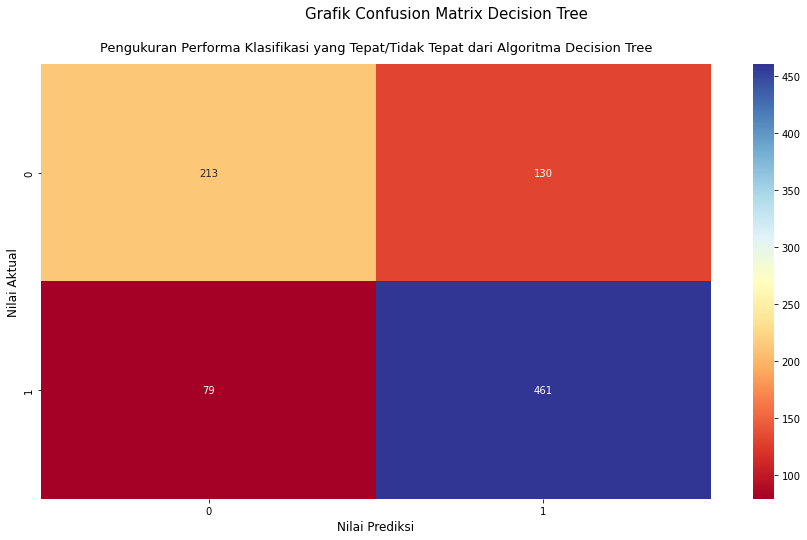

In [22]:
# Pengukuran performa pada Algoritma Decision Tree menggunakan hasil prediksi dari data testing
plt.figure(figsize=(15, 8))

sns.heatmap(confusion_matrix(y_test, pred_DecisionTree), annot=True, cmap="RdYlBu", fmt=".0f")
plt.xlabel("Nilai Prediksi", fontsize=12)
plt.ylabel("Nilai Aktual", fontsize=12)
plt.suptitle("Grafik Confusion Matrix Decision Tree", fontsize=15)
plt.title("Pengukuran Performa Klasifikasi yang Tepat/Tidak Tepat dari Algoritma Decision Tree",
          fontsize=13, pad=13, loc="center")
plt.savefig("../Data Visualization/Confusion Matrix/Confusion Matrix untuk Algoritma Decision Tree.png")
plt.show()

Berikut adalah penjelasan dari grafik confusion matrix berdasarkan pelatihan sekaligus pengujian menggunakan Algoritma Decision Tree yang telah dilatih dengan data training ataupun data testing. Hasil tersebut merupakan hasil klasifikasi/prediksi yang dilakukan oleh data testing yang dimana data testing berfungsi untuk menguji Decision Tree karena sebelumnya algoritma tersebut sudah dilatih dengan data training. Berikut adalah penjelasan dari nilai-nilai pada grafik confusion matrix diatas:

1. Nilai 213 menunjukkan bahwa nilai tersebut adalah TRUE NEGATIVE (TN) yang merupakan data negatif yang berhasil di klasifikasikan dengan benar.
2. Nilai 461 menunjukkan bahwa nilai ini adalah TRUE POSITIVE (TP) yang merupakan data positif yang berhasil di klasifikasikan dengan benar.
3. Nilai 130 menunjukkan bahwa nilai tersebut merupakan FALSE POSITIVE (FP) yang merupakan data negatif namun diklasifikasikan/diprediksi sebagai hasil dari nilai yang positif.
4. Terakhir adalah nilai 79 yang menunjukkan bahwa nilai tersebut adalah FALSE NEGATIVE (FN) yang merupakan data positif namun diklasifikasikan/diprediksi sebagai hasil/output dari nilai negatif.


Sebagai catatan bahwa nilai 0 dan 1, baik yang ada di sumbu x (Nilai Prediksi) dan sumbu y (Nilai Aktual) adalah nilai negatif dan positif. Nilai negatif ditandai dengan angka 0 sedangkan nilai positif ditandai dengan angka 1. Untuk lebih jelasnya adalah seperti ini:

- 0: Nilai Negatif

- 1: Nilai Positif

Referensi:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
- https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [23]:
# Menampilkan performa berdasarkan nilai akurasi dari Algoritma Decision Tree
print("Nilai Akurasi dari Algoritma Decision Tree adalah", accuracy_score(y_test, pred_DecisionTree))

Nilai Akurasi dari Algoritma Decision Tree adalah 0.7633069082672707


Berdasarkan hasil diatas telah diketahui bahwa final performance yang ditunjukkan oleh nilai akurasi dari Algoritma Decision Tree setelah algoritma tersebut dilatih dan diuji dengan sekumpulan data training dan data testing menghasilkan performa kinerja yang sudah cukup bagus yaitu 0.7633069082672707 yang jika dibulatkan menjadi 0.76.

Itu artinya dengan proporsi persentase data pada saat proses split validation yang sebesar 80:20 dalam mengklasifikasikan nilai data dari kolom "Status" menggunakan Decision Tree dapat kita ketahui bahwasanya mayoritas pengklasifikasian data dengan data baru (data testing) yang dilakukan oleh Decision Tree sudah cukup baik walaupun sudah pasti dengan akurasi tersebut masih terdapat beberapa kelasahan dalam memprediksi data baru yang diberikan oleh data testing.

Nilai 0.7633069082672707 atau 0.76 didapatkan melalui perhitungan rumus dari TP + TN / TP + TN + FP + FN. TP merupakan singkatan dari TRUE POSITIVE, TN singkatan dari TRUE NEGATIVE, FP singkatan dari FALSE POSITIVE dan FN singkatan dari FALSE NEGATIVE. Berdasarkan rumus diatas maka didapatkan perhitungan nilai seperti ini:

461 (TP) + 213 (TN) / 461 (TP) + 213 (TN) + 130 (FP) + 79 (FN) = 674 / 883 = 0.7633069082672707.

Referensi perhitungan dan rumus:

- https://www.analyticsvidhya.com/blog/2021/05/in-depth-understanding-of-confusion-matrix/

Selanjutnya saya akan menampilkan nilai menggunakan ketiga metrics klasifikasi yang lain yaitu precision, recall, dan f1_score.

In [24]:
"""
Menampilkan nilai presisi, recall, dan f1_score metrics secara keseluruhan (bukan didasari oleh dua nilai
data dari kolom "Status") berdasarkan hasil prediksi yang telah dilakukan oleh Decision Tree dengan data testing
"""
print("--------------Nilai Presisi dari Algoritma Decision Tree--------------")
print(precision_score(y_test, pred_DecisionTree, average="weighted"), "\n")

print("--------------Nilai Recall dari Algoritma Decision Tree--------------")
print(recall_score(y_test, pred_DecisionTree, average="weighted"), "\n")

print("--------------Nilai F1_Score dari Algoritma Decision Tree--------------")
print(f1_score(y_test, pred_DecisionTree, average="weighted"))

--------------Nilai Presisi dari Algoritma Decision Tree--------------
0.7603854234498252 

--------------Nilai Recall dari Algoritma Decision Tree--------------
0.7633069082672707 

--------------Nilai F1_Score dari Algoritma Decision Tree--------------
0.7591384917391677


Hasil diatas menunjukkan nilai pada ketiga metrics yang biasa digunakan di dalam pengujian klasifikasi machine learning (selain accuracy) yaitu precision, recall, dan f1_score. Ketiga metrics nilai tersebut bukan menunjukkan berdasarkan data negatif/positif seperti yang ditunjukkan pada grafik confusion matrix melainkan perhitungan secara keseluruhan dari final performance pada Algoritma Decision Tree dalam mengklasifikasikan data di dalam variabel dependen/variabel y.

Selain itu terdapat nilai average="weighted" pada precision_score, recall_score, dan f1_score. Nilai average="weighted" ini merupakan perhitungan metrik untuk setiap label/nilai data dengan menemukan pembobotan di nilai rata-rata dengan jumlah instance yang sebenarnya untuk setiap label data. Untuk melihat penjelasan lebih lengkap mengenai average="weighted" dapat dilihat melalui link berikut dan berfokus kepada Parameters:average:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Selanjutnya saya akan menampilkan semua metrics seperti accuracy, precision, recall dan f1-score dengan menggunakan fungsi classification_report dari SKLearn.

In [25]:
"""
Menampilkan final performance (akurasi, presisi, dll) dari Algoritma
Decision Tree berdasarkan data pengujian (data testing)
"""

print("-------------------Hasil Prediksi untuk Algoritma Decision Tree-------------------")
print(classification_report(y_test, pred_DecisionTree))

-------------------Hasil Prediksi untuk Algoritma Decision Tree-------------------
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       343
           1       0.78      0.85      0.82       540

    accuracy                           0.76       883
   macro avg       0.75      0.74      0.74       883
weighted avg       0.76      0.76      0.76       883



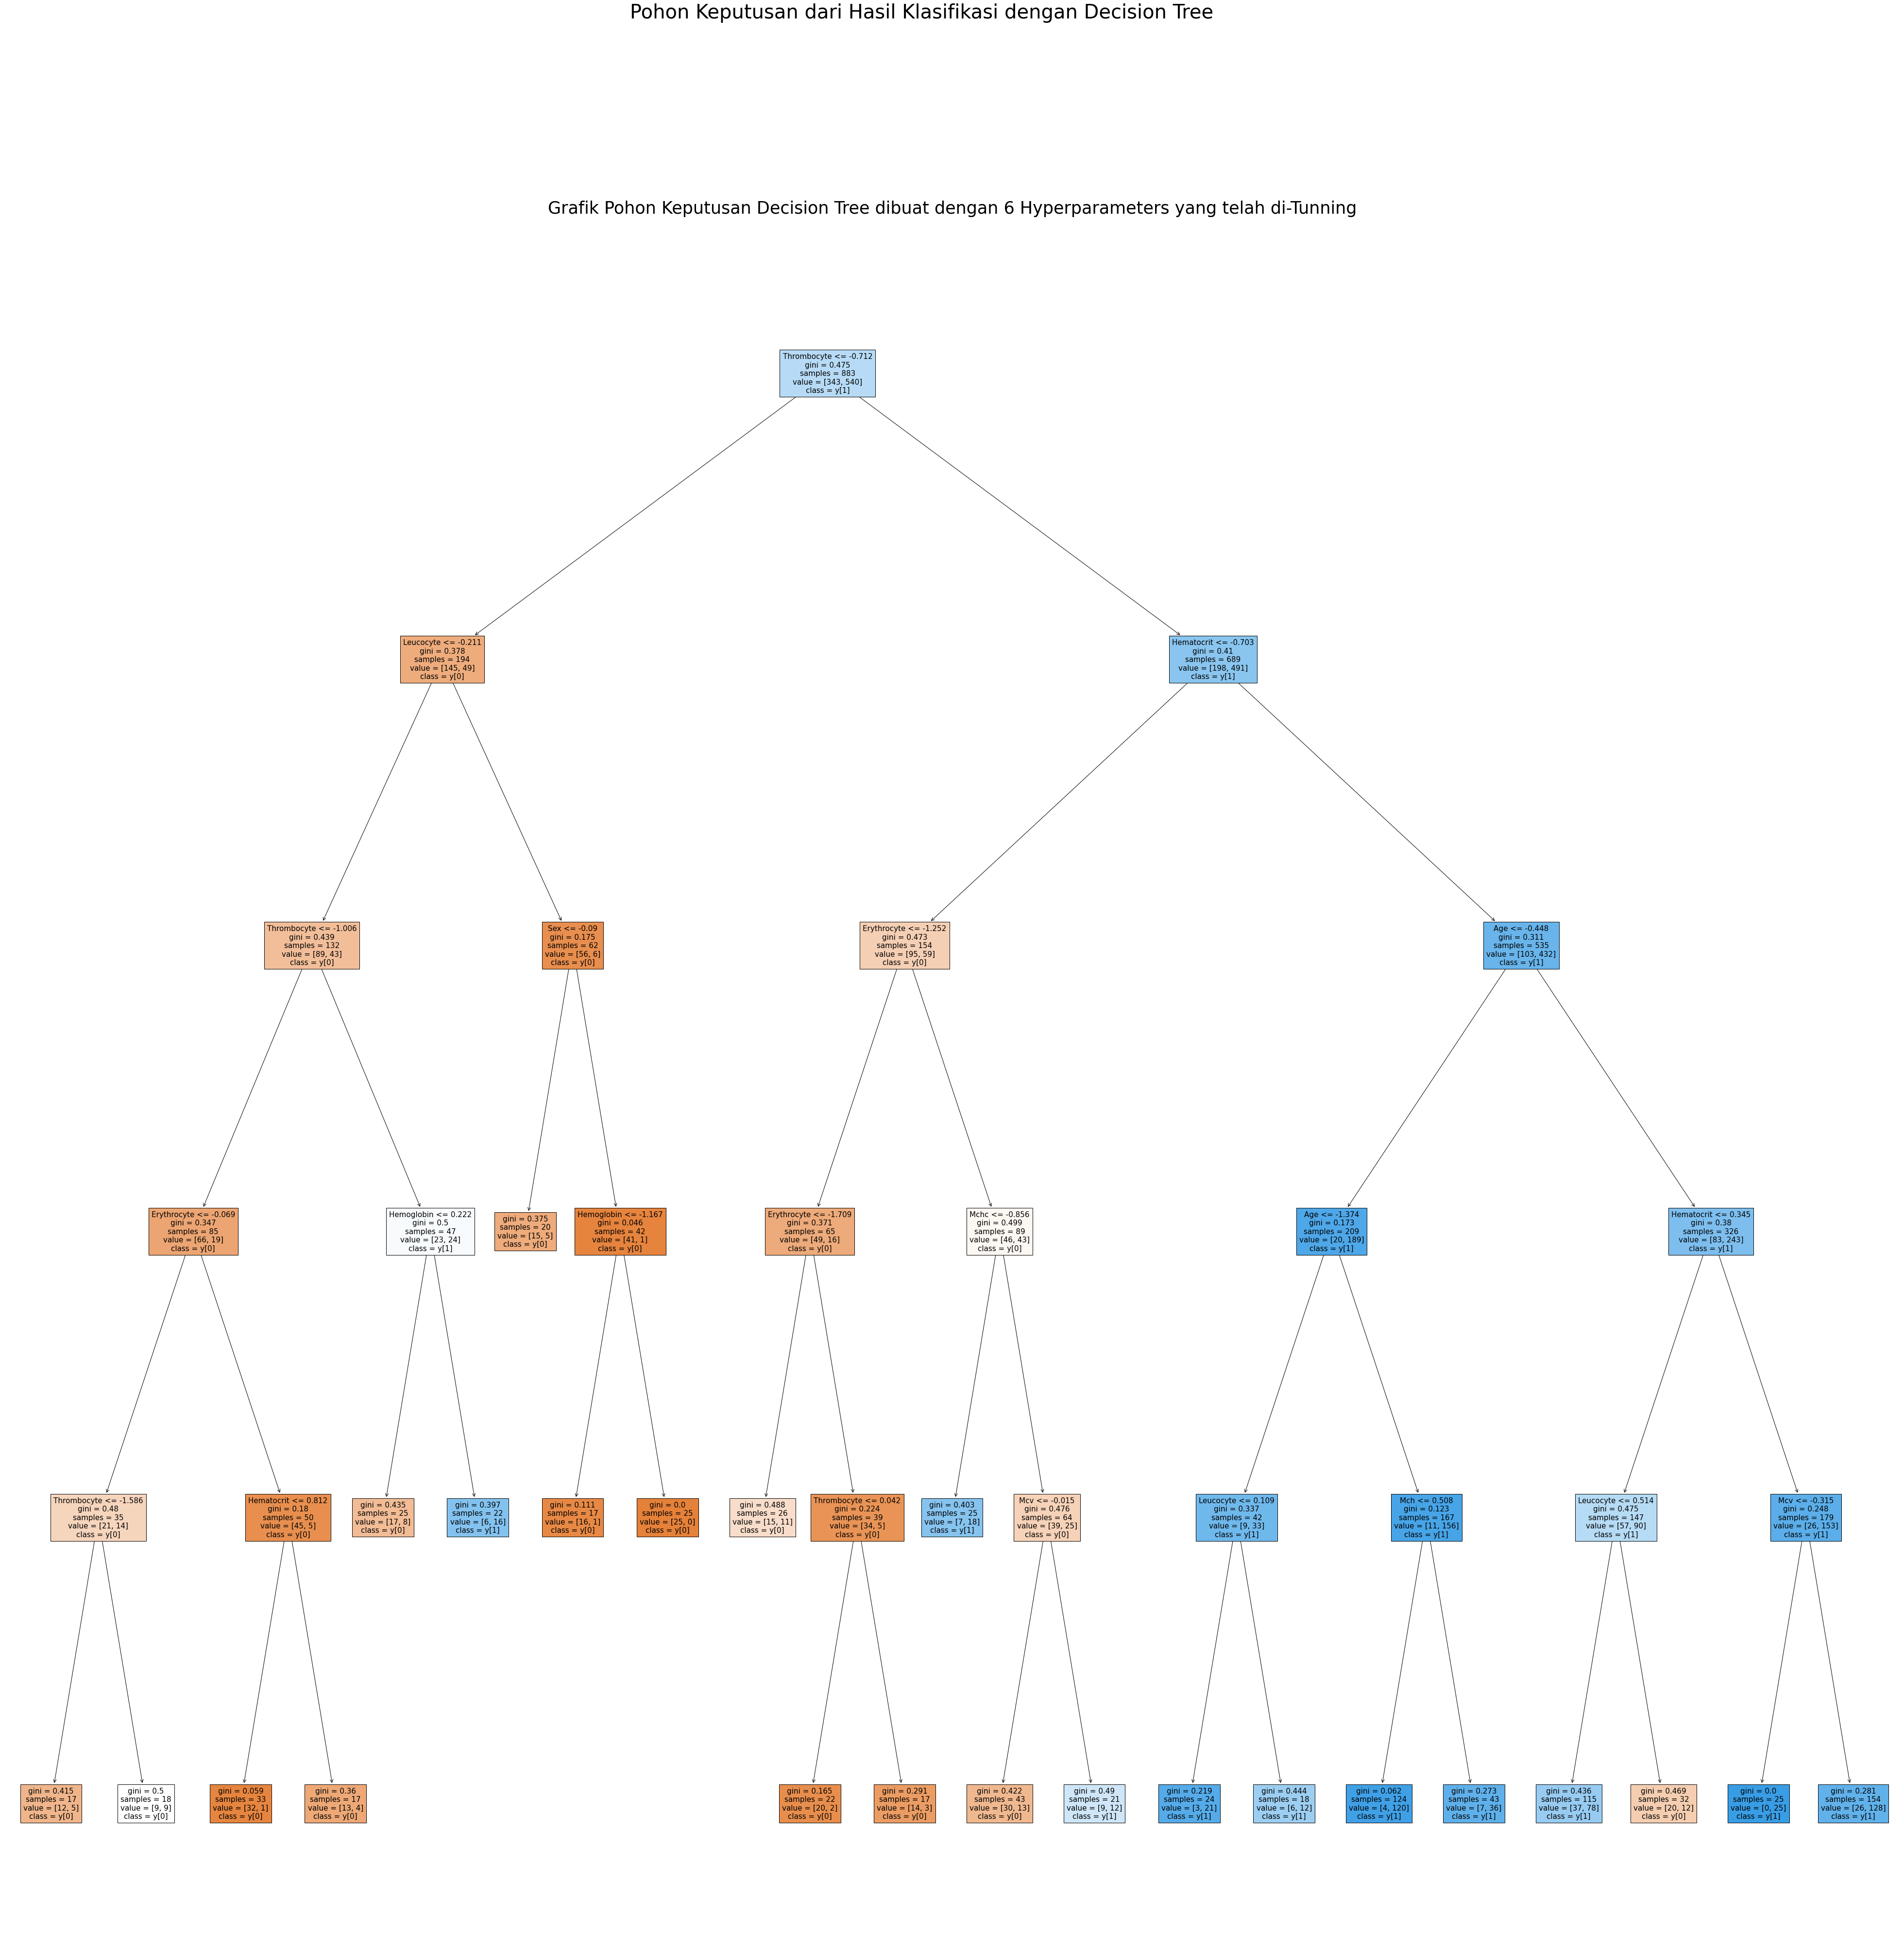

In [26]:
# Membuat visualisasi pohon keputusan dari Algoritma Decision Tree berdasarkan hasil klasifikasi dengan akurasi 0.76

"""
"Mendefinisikan Algoritma Decision Tree beserta parameter hasil tuning
yang sebelumnya telah bertugas dalam melatih algoritma dengan data training
"""
result_prediction_DecisionTree = DecisionTreeClassifier(criterion="gini", min_samples_split=20, max_depth=5,
                                                        splitter="best", min_samples_leaf=17, max_leaf_nodes=26)
result_prediction_DecisionTree.fit(x_test, y_test)

# Membuat sebuah fungsi untuk membuat grafik pohon keputusan berdasarkan hasil klasifikasi dengan Algoritma Decision Tree
def classification_result(testing_data):
    plt.figure(figsize=(70, 65))
    tree.plot_tree(testing_data, feature_names=x.columns, class_names=True, filled=True)
    plt.suptitle("Pohon Keputusan dari Hasil Klasifikasi dengan Decision Tree", fontsize=40)
    plt.title("Grafik Pohon Keputusan Decision Tree dibuat dengan 6 Hyperparameters yang telah di-Tunning",
              fontsize=35, pad=35, loc="center")
    
tree_result_visualization_DecisionTree = classification_result(result_prediction_DecisionTree)
plt.savefig("../Data Visualization/Pohon Keputusan terhadap Hasil Klasifikasi dengan Algoritma Decision Tree.png")

Hasil grafik visualisasi diatas merupakan sebuah grafik pohon keputusan yang khusus hanya dimiliki oleh Algoritma Decision Tree dan di dalam grafik tersebut terdapat beberapa istilah terminologi dalam pohon keputusan dari hasil prediksi/klasifikasi dengan data testing setelah Decision Tree dilatih dengan data training dan hyperparameters yang telah di-tunning. Untuk itu berikut adalah beberapa penjelasan penting yang ada di dalam grafik pohon keputusan:

- Root node: merupakan seluruh sampel/populasi yang selanjutnya dibagi menjadi 2/lebih set variabel yang lebih homogen. Root node juga dapat dikatakan sebagai node tertinggi (yang paling teratas) di dalam grafik struktur pohon keputusan. Root node di dalam grafik pohon keputusan untuk data testing diatas yakni memiliki nilai yaitu Produk (Pesanan Dibuat) <= 1.5 dengan nilai absolute_error yakni 2.901 dari samples ke 121 dengan nilai value = 2.0.

- Splitting: istilah ini merupakan sebuah pemrosesan dalam membagi sebuah node (baik dari root node/decision node) menjadi dua atau lebih sub-node pada grafik pohon keputusan. Splitting juga dapat dikatakan sebagai garis pembagi dalam grafik pohon keputusan.
- Decision node: merupakan istilah dalam grafik pohon keputusan untuk memecah sub-node menjadi sub-node yang lebih lanjut. Salah satu contoh dari decision node di dalam grafik pohon keputusan terhadap data testing adalah ketika nilai pada Produk (Pesanan Dibuat) <= 0.9 dengan nilai metrics absolute_error adalah 0.6 dari samples data 10 dan juga value = 6.0.

- Terminal node (leaf node): merupakan node atau bagian di dalam grafik pohon keputusan yang tidak memiliki cabang. Sebagai contoh dari leaf node dalam grafi pohon keputusan terhadap data testing adalah ketika nilai absolute_error = 3.667 berdasarkan samples = 3 dengan nilai value = 31.0.

Berikut adalah referensi untuk membaca dan memahami grafik pohon keputusan setelah mengklasifikasikan data yang ada di dalam variabel dependen dengan Algoritma Decision Tree:

- https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

- http://diyanaprilia.blog.widyatama.ac.id/2019/10/08/4-decision-tree/

- https://www.mastersindatascience.org/learning/machine-learning-algorithms/decision-tree/#:~:text=A%20decision%20tree%20resembles%2C%20well,the%20consequences%20of%20those%20decisions.

### 3.3. Support Vector Machine (SVM)

In [27]:
"""
Memanggil Algoritma Support Vector Machine (SVM) dari library sklearn yang sebelumnya library untuk SVM
telah didefinisikan pada tahap Import Libraries. Nantinya Algoritma SVM akan dilatih
menggunakan sekumpulan data training. Selain tahapan tersebut, tahap ini juga akan mencari nilai terbaik dari beberapa
hyperparameters (kita sebut sebagai proses tuning hyperparameters) yang berasal dari Algoritma Support Vector Machine.
Untuk membantu dalam mencari the best value per parameter dengan tuning,
saya akan menggunakan sebuah teknik validasi parameter algoritma yang bernama GridSearchCV
"""

SupportVectorMachine_algorithm = SVC()

parameters_SupportVectorMachine = {
    "kernel": ["linear", "rbf"],
    "C": [11.34, 2.4, 13.8, 20.2, 8.7, 27.57, 34.10, 6.9, 37.8, 41.1]
}

grid_search_SVM = GridSearchCV(SupportVectorMachine_algorithm, parameters_SupportVectorMachine)
grid_search_SVM.fit(x_train, y_train)

# Melihat nilai terbaik dari parameter-parameter yang telah didefinisikan di dalam variabel parameters_SupportVectorMachine
print("Nilai Terbaik dari Parameter kernel adalah: ", grid_search_SVM.best_estimator_.get_params()["kernel"])
print("Nilai Terbaik dari Parameter C adalah: ", grid_search_SVM.best_estimator_.get_params()["C"])

Nilai Terbaik dari Parameter kernel adalah:  rbf
Nilai Terbaik dari Parameter C adalah:  2.4


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter di Algoritma Support Vector Machine (SVM) maka didapatkan beberapa kesimpulan diantaranya:

1. Dari kedua argumen/nilai yang ada di dalam parameter kernel (linear dan rbf) yang didefinisikan pada variabel parameters_SupportVectorMachine didapatkan sebuah argumen parameter yang paling baik dan cocok untuk digunakan dalam melatih Algoritma SVM. The best value from kernel parameter is rbf yang di mana kernel rbf merupakan kernel default/bawaan dari Algoritma Support Vector Machine (SVM).
2. Parameter terakhir yang didefinisikan di dalam variabel parameters_SupportVectorMachine adalah parameter C yang menghasilkan the best value in this parameter is 2.4.

Pada proses tuning hyperparameters atau dapat dikatakan sebagai proses pencarian nilai terbaik di dalam parameter-parameter dari suatu algoritma yang didefisinikan, Algoritma Support Vector Machine, saya juga menggunakan sebuah fungsi yang bernama GridSearchCV. GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari atau memvalidasi sebuah nilai terbaik (the best value in each parameters) dengan otomatis untuk setiap parameter-parameter dari Algoritma Machine Learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- https://www.mygreatlearning.com/blog/gridsearchcv/

- https://medium.com/@adiptamartulandi/tuning-hyperparameters-logistic-regression-menggunakan-grid-search-ucupstory-fb1ab9db082a

In [28]:
"""
Menguji sekaligus menampilkan hasil prediksi dengan data testing setelah
pada tahap sebelumnya telah dilakukan proses tunning hyperparameter
"""
print("----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma SVM menggunakan Data Training----------")
pred_SVM = grid_search_SVM.predict(x_test)
print(pred_SVM)

----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma SVM menggunakan Data Training----------
[1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1
 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1

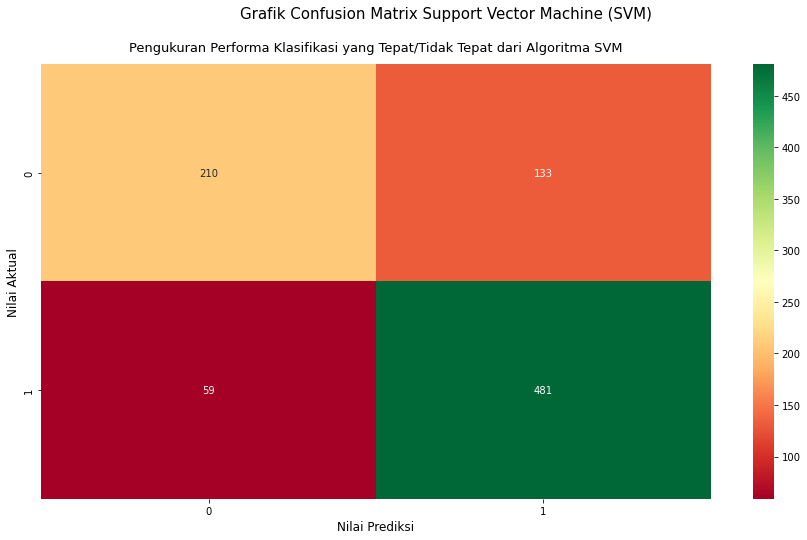

In [29]:
# Pengukuran performa pada Algoritma Support Vector Machine (SVM) menggunakan hasil prediksi dari data testing
plt.figure(figsize=(15, 8))

sns.heatmap(confusion_matrix(y_test, pred_SVM), annot=True, cmap="RdYlGn", fmt=".0f")
plt.xlabel("Nilai Prediksi", fontsize=12)
plt.ylabel("Nilai Aktual", fontsize=12)
plt.suptitle("Grafik Confusion Matrix Support Vector Machine (SVM)", fontsize=15)
plt.title("Pengukuran Performa Klasifikasi yang Tepat/Tidak Tepat dari Algoritma SVM",
          fontsize=13, pad=13, loc="center")
plt.savefig("../Data Visualization/Confusion Matrix/Confusion Matrix untuk Algoritma SVM.png")
plt.show()

Berikut adalah penjelasan dari grafik confusion matrix berdasarkan pelatihan sekaligus pengujian menggunakan Algoritma Support Vector Machine yang telah dilatih dengan data training ataupun data testing. Hasil tersebut merupakan hasil klasifikasi/prediksi yang dilakukan oleh data testing yang dimana data testing berfungsi untuk menguji Support Vector Machine karena sebelumnya algoritma tersebut sudah dilatih dengan data training. Berikut adalah penjelasan dari nilai-nilai pada grafik confusion matrix diatas:

1. Nilai 210 menunjukkan bahwa nilai tersebut adalah TRUE NEGATIVE (TN) yang merupakan data negatif yang berhasil di klasifikasikan dengan benar.
2. Nilai 481 menunjukkan bahwa nilai ini adalah TRUE POSITIVE (TP) yang merupakan data positif yang berhasil di klasifikasikan dengan benar.
3. Nilai 133 menunjukkan bahwa nilai tersebut merupakan FALSE POSITIVE (FP) yang merupakan data negatif namun diklasifikasikan/diprediksi sebagai hasil dari nilai yang positif.
4. Terakhir adalah nilai 59 yang menunjukkan bahwa nilai tersebut adalah FALSE NEGATIVE (FN) yang merupakan data positif namun diklasifikasikan/diprediksi sebagai hasil/output dari nilai negatif.


Sebagai catatan bahwa nilai 0 dan 1, baik yang ada di sumbu x (Nilai Prediksi) dan sumbu y (Nilai Aktual) adalah nilai negatif dan positif. Nilai negatif ditandai dengan angka 0 sedangkan nilai positif ditandai dengan angka 1. Untuk lebih jelasnya adalah seperti ini:

- 0: Nilai Negatif

- 1: Nilai Positif

Referensi:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
- https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [30]:
# Menampilkan performa berdasarkan nilai akurasi dari Algoritma Support Vector Machine (SVM)
print("Nilai Akurasi dari Algoritma Support Vector Machine (SVM) adalah", accuracy_score(y_test, pred_SVM))

Nilai Akurasi dari Algoritma Support Vector Machine (SVM) adalah 0.782559456398641


Berdasarkan hasil diatas telah diketahui bahwa final performance yang ditunjukkan oleh nilai akurasi dari Algoritma Support Vector Machine (SVM) setelah algoritma tersebut dilatih dan diuji dengan sekumpulan data training dan data testing menghasilkan performa kinerja yang sudah cukup bagus yaitu 0.782559456398641 yang jika dibulatkan menjadi 0.78.

Itu artinya dengan proporsi persentase data pada saat proses split validation yang sebesar 80:20 dalam mengklasifikasikan nilai data dari kolom "Status" menggunakan SVM dapat kita ketahui bahwasanya mayoritas pengklasifikasian data dengan data baru (data testing) yang dilakukan oleh SVM sudah cukup baik walaupun sudah pasti dengan akurasi tersebut masih terdapat beberapa kelasahan dalam memprediksi data baru yang diberikan oleh data testing.

Nilai 0.782559456398641 atau 0.78 didapatkan melalui perhitungan rumus dari TP + TN / TP + TN + FP + FN. TP merupakan singkatan dari TRUE POSITIVE, TN singkatan dari TRUE NEGATIVE, FP singkatan dari FALSE POSITIVE dan FN singkatan dari FALSE NEGATIVE. Berdasarkan rumus diatas maka didapatkan perhitungan nilai seperti ini:

481 (TP) + 210 (TN) / 481 (TP) + 210 (TN) + 133 (FP) + 59 (FN) = 691 / 883 = 0.782559456398641.

Referensi perhitungan dan rumus:

- https://www.analyticsvidhya.com/blog/2021/05/in-depth-understanding-of-confusion-matrix/

Selanjutnya saya akan menampilkan nilai menggunakan ketiga metrics klasifikasi yang lain yaitu precision, recall, dan f1_score.

In [31]:
"""
Menampilkan nilai presisi, recall, dan f1_score metrics secara keseluruhan (bukan didasari oleh dua nilai
data dari kolom "Status") berdasarkan hasil prediksi yang telah dilakukan oleh Support Vector Machine (SVM) dengan data testing
"""
print("--------------Nilai Presisi dari Algoritma Support Vector Machine (SVM)--------------")
print(precision_score(y_test, pred_SVM, average="weighted"), "\n")

print("--------------Nilai Recall dari Algoritma Support Vector Machine (SVM)--------------")
print(recall_score(y_test, pred_SVM, average="weighted"), "\n")

print("--------------Nilai F1_Score dari Algoritma Support Vector Machine (SVM)--------------")
print(f1_score(y_test, pred_SVM, average="weighted"))

--------------Nilai Presisi dari Algoritma Support Vector Machine (SVM)--------------
0.7823316338499847 

--------------Nilai Recall dari Algoritma Support Vector Machine (SVM)--------------
0.782559456398641 

--------------Nilai F1_Score dari Algoritma Support Vector Machine (SVM)--------------
0.7763852050572119


Hasil diatas menunjukkan nilai pada ketiga metrics yang biasa digunakan di dalam pengujian klasifikasi machine learning (selain accuracy) yaitu precision, recall, dan f1_score. Ketiga metrics nilai tersebut bukan menunjukkan berdasarkan data negatif/positif seperti yang ditunjukkan pada grafik confusion matrix melainkan perhitungan secara keseluruhan dari final performance pada Algoritma Support Vector Machine (SVM) dalam mengklasifikasikan data di dalam variabel dependen/variabel y.

Selain itu terdapat nilai average="weighted" pada precision_score, recall_score, dan f1_score. Nilai average="weighted" ini merupakan perhitungan metrik untuk setiap label/nilai data dengan menemukan pembobotan di nilai rata-rata dengan jumlah instance yang sebenarnya untuk setiap label data. Untuk melihat penjelasan lebih lengkap mengenai average="weighted" dapat dilihat melalui link berikut dan berfokus kepada Parameters:average:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Selanjutnya saya akan menampilkan semua metrics seperti accuracy, precision, recall dan f1-score dengan menggunakan fungsi classification_report dari SKLearn.

In [32]:
"""
Menampilkan final performance (akurasi, presisi, dll) dari Algoritma
Support Vector Machine (SVM) berdasarkan data pengujian (data testing)
"""

print("-------------------Hasil Prediksi untuk Algoritma Support Vector Machine (SVM)-------------------")
print(classification_report(y_test, pred_SVM))

-------------------Hasil Prediksi untuk Algoritma Support Vector Machine (SVM)-------------------
              precision    recall  f1-score   support

           0       0.78      0.61      0.69       343
           1       0.78      0.89      0.83       540

    accuracy                           0.78       883
   macro avg       0.78      0.75      0.76       883
weighted avg       0.78      0.78      0.78       883



### 3.4. K-Nearest Neighbors (KNN)

In [33]:
"""
Memanggil Algoritma K-Nearest Neighbors (KNN) dari library sklearn yang sebelumnya library untuk K-Nearest Neighbors
telah didefinisikan pada tahap Import Libraries. Nantinya Algoritma K-Nearest Neighbors akan dilatih
menggunakan sekumpulan data training (x_train dan y_train). Selain tahapan tersebut,
tahap ini juga akan mencari nilai terbaik dari beberapa hyperparameters (kita sebut sebagai proses
tuning hyperparameters) yang berasal dari Algoritma K-Nearest Neighbors. Untuk membantu dalam mencari the best value
per parameter dengan tuning, saya akan menggunakan sebuah teknik validasi parameter algoritma yang bernama GridSearchCV
"""

KNearestNeighbor_algorithm = KNeighborsClassifier()

parameters_KNN = {
    "n_neighbors": [2, 6, 1, 8, 4, 7, 5, 10, 3, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["brute", "auto"],
    "leaf_size": [2, 6, 11, 38, 47, 24, 32, 15, 34, 52]
}

grid_search_KNN = GridSearchCV(KNearestNeighbor_algorithm, parameters_KNN)
grid_search_KNN.fit(x_train, y_train)

# Melihat nilai terbaik dari parameter-parameter yang telah didefinisikan di dalam variabel parameters_KNN
print("Nilai Terbaik dari Parameter n_neighbors adalah: ", grid_search_KNN.best_estimator_.get_params()["n_neighbors"])
print("Nilai Terbaik dari Parameter weights adalah: ", grid_search_KNN.best_estimator_.get_params()["weights"])
print("Nilai Terbaik dari Parameter algorithm adalah: ", grid_search_KNN.best_estimator_.get_params()["algorithm"])
print("Nilai Terbaik dari Parameter leaf_size adalah: ", grid_search_KNN.best_estimator_.get_params()["leaf_size"])

Nilai Terbaik dari Parameter n_neighbors adalah:  10
Nilai Terbaik dari Parameter weights adalah:  distance
Nilai Terbaik dari Parameter algorithm adalah:  brute
Nilai Terbaik dari Parameter leaf_size adalah:  2


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter di Algoritma K-Nearest Neighbors (KNN) maka didapatkan beberapa kesimpulan diantaranya:

1. Parameter pertama yang didefinisikan di dalam variabel parameters_KNN adalah parameter n_neighbors. Dari 10 nilai yang didefinisikan di dalam parameter ini terdapat 1 nilai yang paling cocok dalam melatih Algoritma KNN yaitu 10.
2. Dari kedua argumen/nilai yang ada di dalam parameter weights (uniform dan distance) yang didefinisikan pada variabel parameters_KNN didapatkan sebuah argumen/nilai parameter yang paling baik dan cocok untuk digunakan dalam melatih Algoritma KNN yaitu distance.
3. Parameter ketiga yang didefinisikan di dalam parameters_KNN adalah algorithm. Dari kedua argumen/nilai yang ada di dalam parameter algorithm (brute dan auto), hasil tunning hyperparameters KNN menunjukkan bahwa argumen/nilai terbaik dari parameter algorithm adalah brute.
4. Terakhir adalah parameter leaf_size yang didefinisikan di dalam variabel parameters_KNN yang menghasilkan nilai dari hasil proses tuning hyperparameters yaitu 2.

Pada proses tuning hyperparameters atau dapat dikatakan sebagai proses pencarian nilai terbaik di dalam parameter-parameter dari suatu algoritma yang didefisinikan, Algoritma KNN, saya juga menggunakan sebuah fungsi yang bernama GridSearchCV. GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari atau memvalidasi sebuah nilai terbaik (the best value in each parameters) dengan otomatis untuk setiap parameter-parameter dari Algoritma Machine Learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- https://www.mygreatlearning.com/blog/gridsearchcv/

In [34]:
"""
Menguji sekaligus menampilkan hasil prediksi dengan data testing setelah
pada tahap sebelumnya telah dilakukan proses tunning hyperparameter
"""
print("----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma KNN menggunakan Data Training----------")
pred_KNearestNeighbors = grid_search_KNN.predict(x_test)
print(pred_KNearestNeighbors)

----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma KNN menggunakan Data Training----------
[0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0
 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1
 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1

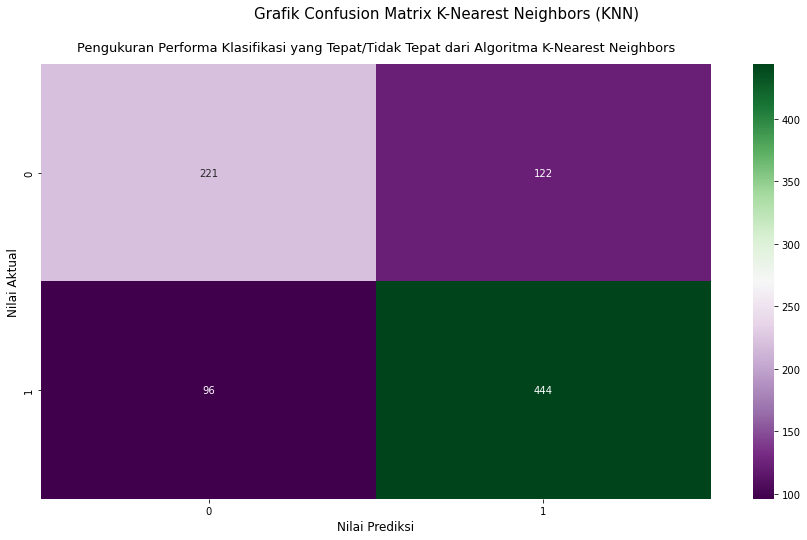

In [35]:
# Pengukuran performa pada Algoritma K-Nearest Neighbors (KNN) menggunakan hasil prediksi dari data testing
plt.figure(figsize=(15, 8))

sns.heatmap(confusion_matrix(y_test, pred_KNearestNeighbors), annot=True, cmap="PRGn", fmt=".0f")
plt.xlabel("Nilai Prediksi", fontsize=12)
plt.ylabel("Nilai Aktual", fontsize=12)
plt.suptitle("Grafik Confusion Matrix K-Nearest Neighbors (KNN)", fontsize=15)
plt.title("Pengukuran Performa Klasifikasi yang Tepat/Tidak Tepat dari Algoritma K-Nearest Neighbors",
          fontsize=13, pad=13, loc="center")
plt.savefig("../Data Visualization/Confusion Matrix/Confusion Matrix untuk Algoritma K-Nearest Neighbors (KNN).png")
plt.show()

Berikut adalah penjelasan dari grafik confusion matrix berdasarkan pelatihan sekaligus pengujian menggunakan Algoritma K-Nearest Neighbors (KNN) yang telah dilatih dengan data training ataupun data testing. Hasil tersebut merupakan hasil klasifikasi/prediksi yang dilakukan oleh data testing yang dimana data testing berfungsi untuk menguji K-Nearest Neighbors karena sebelumnya algoritma tersebut sudah dilatih dengan data training. Berikut adalah penjelasan dari nilai-nilai pada grafik confusion matrix diatas:

1. Nilai 221 menunjukkan bahwa nilai tersebut adalah TRUE NEGATIVE (TN) yang merupakan data negatif yang berhasil di klasifikasikan dengan benar.
2. Nilai 444 menunjukkan bahwa nilai ini adalah TRUE POSITIVE (TP) yang merupakan data positif yang berhasil di klasifikasikan dengan benar.
3. Nilai 122 menunjukkan bahwa nilai tersebut merupakan FALSE POSITIVE (FP) yang merupakan data negatif namun diklasifikasikan/diprediksi sebagai hasil dari nilai yang positif.
4. Terakhir adalah nilai 96 yang menunjukkan bahwa nilai tersebut adalah FALSE NEGATIVE (FN) yang merupakan data positif namun diklasifikasikan/diprediksi sebagai hasil/output dari nilai negatif.


Sebagai catatan bahwa nilai 0 dan 1, baik yang ada di sumbu x (Nilai Prediksi) dan sumbu y (Nilai Aktual) adalah nilai negatif dan positif. Nilai negatif ditandai dengan angka 0 sedangkan nilai positif ditandai dengan angka 1. Untuk lebih jelasnya adalah seperti ini:

- 0: Nilai Negatif

- 1: Nilai Positif

Referensi:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
- https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [36]:
# Menampilkan performa berdasarkan nilai akurasi dari Algoritma K-Nearest Neighbors (KNN)
print("Nilai Akurasi dari Algoritma K-Nearest Neighbors (KNN) adalah", accuracy_score(y_test, pred_KNearestNeighbors))

Nilai Akurasi dari Algoritma K-Nearest Neighbors (KNN) adalah 0.753114382785957


Berdasarkan hasil diatas telah diketahui bahwa final performance yang ditunjukkan oleh nilai akurasi dari Algoritma K-Nearest Neighbors (KNN) setelah algoritma tersebut dilatih dan diuji dengan sekumpulan data training dan data testing menghasilkan performa kinerja yang sudah cukup bagus yaitu 0.753114382785957 yang jika dibulatkan tetap menjadi 0.75.

Itu artinya dengan proporsi persentase data pada saat proses split validation yang sebesar 80:20 dalam mengklasifikasikan nilai data dari kolom "Status" menggunakan K-Nearest Neighbors dapat kita ketahui bahwasanya mayoritas pengklasifikasian data dengan data baru (data testing) yang dilakukan oleh KNN sudah cukup baik walaupun sudah pasti dengan akurasi tersebut masih terdapat beberapa kelasahan dalam memprediksi data baru yang diberikan oleh data testing.

Nilai 0.753114382785957 atau 0.75 didapatkan melalui perhitungan rumus dari TP + TN / TP + TN + FP + FN. TP merupakan singkatan dari TRUE POSITIVE, TN singkatan dari TRUE NEGATIVE, FP singkatan dari FALSE POSITIVE dan FN singkatan dari FALSE NEGATIVE. Berdasarkan rumus diatas maka didapatkan perhitungan nilai seperti ini:

444 (TP) + 221 (TN) / 444 (TP) + 221 (TN) + 122 (FP) + 96 (FN) = 665 / 883 = 0.753114382785957.

Referensi perhitungan dan rumus:

- https://www.analyticsvidhya.com/blog/2021/05/in-depth-understanding-of-confusion-matrix/

Selanjutnya saya akan menampilkan nilai menggunakan ketiga metrics klasifikasi yang lain yaitu precision, recall, dan f1_score.

In [37]:
"""
Menampilkan nilai presisi, recall, dan f1_score metrics secara keseluruhan (bukan didasari oleh dua nilai
data dari kolom "Status") berdasarkan hasil prediksi yang telah dilakukan oleh K-Nearest Neighbors (KNN) dengan data testing
"""
print("--------------Nilai Presisi dari Algoritma K-Nearest Neighbors (KNN)--------------")
print(precision_score(y_test, pred_KNearestNeighbors, average="weighted"), "\n")

print("--------------Nilai Recall dari Algoritma K-Nearest Neighbors (KNN)--------------")
print(recall_score(y_test, pred_KNearestNeighbors, average="weighted"), "\n")

print("--------------Nilai F1_Score dari Algoritma K-Nearest Neighbors (KNN)--------------")
print(f1_score(y_test, pred_KNearestNeighbors, average="weighted"))

--------------Nilai Presisi dari Algoritma K-Nearest Neighbors (KNN)--------------
0.750544080688545 

--------------Nilai Recall dari Algoritma K-Nearest Neighbors (KNN)--------------
0.753114382785957 

--------------Nilai F1_Score dari Algoritma K-Nearest Neighbors (KNN)--------------
0.7511533947748233


Hasil diatas menunjukkan nilai pada ketiga metrics yang biasa digunakan di dalam pengujian klasifikasi machine learning (selain accuracy) yaitu precision, recall, dan f1_score. Ketiga metrics nilai tersebut bukan menunjukkan berdasarkan data negatif/positif seperti yang ditunjukkan pada grafik confusion matrix melainkan perhitungan secara keseluruhan dari final performance pada Algoritma K-Nearest Neighbors (KNN) dalam mengklasifikasikan data di dalam variabel dependen/variabel y.

Selain itu terdapat nilai average="weighted" pada precision_score, recall_score, dan f1_score. Nilai average="weighted" ini merupakan perhitungan metrik untuk setiap label/nilai data dengan menemukan pembobotan di nilai rata-rata dengan jumlah instance yang sebenarnya untuk setiap label data. Untuk melihat penjelasan lebih lengkap mengenai average="weighted" dapat dilihat melalui link berikut dan berfokus kepada Parameters:average:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Selanjutnya saya akan menampilkan semua metrics seperti accuracy, precision, recall dan f1-score dengan menggunakan fungsi classification_report dari SKLearn.

In [38]:
"""
Menampilkan final performance (akurasi, presisi, dll) dari Algoritma
K-Nearest Neighbors (KNN) berdasarkan data pengujian (data testing)
"""

print("-------------------Hasil Prediksi untuk Algoritma K-Nearest Neighbors (KNN)-------------------")
print(classification_report(y_test, pred_KNearestNeighbors))

-------------------Hasil Prediksi untuk Algoritma K-Nearest Neighbors (KNN)-------------------
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       343
           1       0.78      0.82      0.80       540

    accuracy                           0.75       883
   macro avg       0.74      0.73      0.74       883
weighted avg       0.75      0.75      0.75       883



### 3.5. Naive Bayes

In [39]:
"""
Mengimplementasikan Algoritma Naive Bayes dari library sklearn yang sebelumnya library untuk Naive Bayes
telah didefinisikan pada tahap Import Libraries. Sebelum mengklasifikasikan data, Algoritma Naive Bayes akan dilatih
menggunakan sekumpulan data training (x_train dan y_train). Selain tahapan tersebut,
tahap ini juga akan mencari nilai terbaik dari beberapa hyperparameters (kita sebut sebagai proses
tuning hyperparameters) yang berasal dari Algoritma Naive Bayes. Untuk membantu dalam mencari the best value
per parameter dengan tuning, saya akan menggunakan sebuah teknik validasi parameter algoritma yang bernama GridSearchCV
"""

NaiveBayes_algorithm = GaussianNB()

parameters_naive_bayes = {
    "var_smoothing": np.logspace(0.1, 6.5)
}

grid_search_NaiveBayes = GridSearchCV(NaiveBayes_algorithm, parameters_naive_bayes)
grid_search_NaiveBayes.fit(x_train, y_train)

# Melihat nilai terbaik dari parameter-parameter yang telah didefinisikan di dalam variabel parameters_naive_bayes
print("Nilai Terbaik dari Parameter var_smoothing adalah: ",
      grid_search_NaiveBayes.best_estimator_.get_params()["var_smoothing"])

Nilai Terbaik dari Parameter var_smoothing adalah:  1.2589254117941673


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter di Algoritma Naive Bayes maka didapatkan beberapa kesimpulan diantaranya:

1. Parameter pertama dan terakhir yang didefinisikan di dalam variabel parameters_naive_bayes adalah parameter var_smoothing. Berbeda dari teknik sebelumnya dalam mendefinisikan nilai parameter, pada parameter var_smoothing yang hanya dimiliki oleh Algoritma Naive Bayes, saya mendefinisikan the best value untuk melatih Naive Bayes dengan Data Training adalah dengan menggunakan fungsi "logspace" dari library Numpy. Fungsi "logspace" digunakan ketika untuk mengembalikan angka dengan jarak yang sama pada skala log dan nilai yang cocok dari parameter var_smoothing yang digunakan dalam melatih Algoritma Naive Bayes adalah nilai 1.2589254117941673 yang jika dibulatkan menjadi 1.26.

Pada proses tuning hyperparameters atau dapat dikatakan sebagai proses pencarian nilai terbaik di dalam parameter-parameter dari suatu algoritma yang didefisinikan, Algoritma Naive Bayes, saya juga menggunakan sebuah fungsi yang bernama GridSearchCV. GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari atau memvalidasi sebuah nilai terbaik (the best value in each parameters) dengan otomatis untuk setiap parameter-parameter dari Algoritma Machine Learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

- https://www.mygreatlearning.com/blog/gridsearchcv/

In [40]:
"""
Menguji sekaligus menampilkan hasil prediksi dengan data testing setelah
pada tahap sebelumnya telah dilakukan proses tunning hyperparameter
"""
print("----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Naive Bayes menggunakan Data Training----------")
pred_NaiveBayes = grid_search_NaiveBayes.predict(x_test)
print(pred_NaiveBayes)

----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Naive Bayes menggunakan Data Training----------
[1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0
 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1
 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0

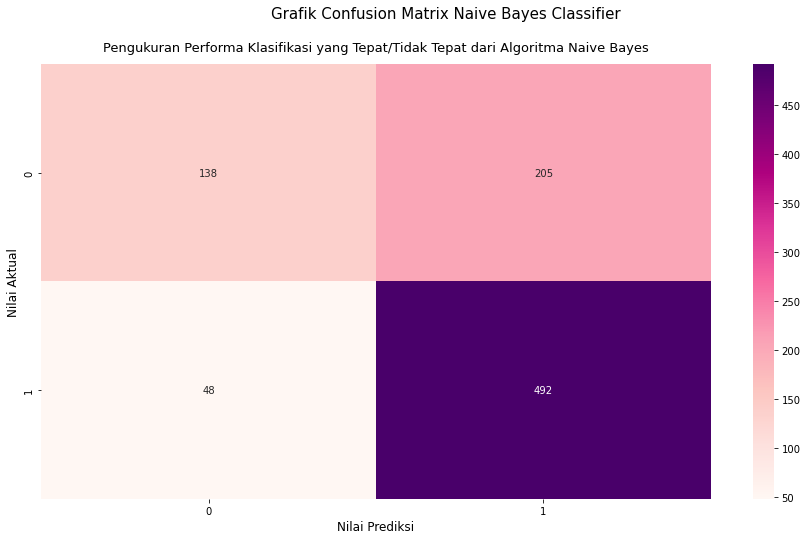

In [41]:
# Pengukuran performa pada Algoritma Naive Bayes menggunakan hasil prediksi dari data testing
plt.figure(figsize=(15, 8))

sns.heatmap(confusion_matrix(y_test, pred_NaiveBayes), annot=True, cmap="RdPu", fmt=".0f")
plt.xlabel("Nilai Prediksi", fontsize=12)
plt.ylabel("Nilai Aktual", fontsize=12)
plt.suptitle("Grafik Confusion Matrix Naive Bayes Classifier", fontsize=15)
plt.title("Pengukuran Performa Klasifikasi yang Tepat/Tidak Tepat dari Algoritma Naive Bayes",
          fontsize=13, pad=13, loc="center")
plt.savefig("../Data Visualization/Confusion Matrix/Confusion Matrix untuk Algoritma Naive Bayes.png")
plt.show()

Berikut adalah penjelasan dari grafik confusion matrix berdasarkan pelatihan sekaligus pengujian menggunakan Algoritma Naive Bayes yang telah dilatih dengan data training ataupun data testing. Hasil tersebut merupakan hasil klasifikasi/prediksi yang dilakukan oleh data testing yang dimana data testing berfungsi untuk menguji Naive Bayes karena sebelumnya algoritma tersebut sudah dilatih dengan data training. Berikut adalah penjelasan dari nilai-nilai pada grafik confusion matrix diatas:

1. Nilai 138 menunjukkan bahwa nilai tersebut adalah TRUE NEGATIVE (TN) yang merupakan data negatif yang berhasil di klasifikasikan dengan benar.
2. Nilai 492 menunjukkan bahwa nilai ini adalah TRUE POSITIVE (TP) yang merupakan data positif yang berhasil di klasifikasikan dengan benar.
3. Nilai 205 menunjukkan bahwa nilai tersebut merupakan FALSE POSITIVE (FP) yang merupakan data negatif namun diklasifikasikan/diprediksi sebagai hasil dari nilai yang positif.
4. Terakhir adalah nilai 48 yang menunjukkan bahwa nilai tersebut adalah FALSE NEGATIVE (FN) yang merupakan data positif namun diklasifikasikan/diprediksi sebagai hasil/output dari nilai negatif.


Sebagai catatan bahwa nilai 0 dan 1, baik yang ada di sumbu x (Nilai Prediksi) dan sumbu y (Nilai Aktual) adalah nilai negatif dan positif. Nilai negatif ditandai dengan angka 0 sedangkan nilai positif ditandai dengan angka 1. Untuk lebih jelasnya adalah seperti ini:

- 0: Nilai Negatif

- 1: Nilai Positif

Referensi:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
- https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [42]:
# Menampilkan performa berdasarkan nilai akurasi dari Algoritma Naive Bayes
print("Nilai Akurasi dari Algoritma Naive Bayes adalah", accuracy_score(y_test, pred_NaiveBayes))

Nilai Akurasi dari Algoritma Naive Bayes adalah 0.7134767836919592


Berdasarkan hasil diatas telah diketahui bahwa final performance yang ditunjukkan oleh nilai akurasi dari Algoritma Naive Bayes setelah algoritma tersebut dilatih dan diuji dengan sekumpulan data training dan data testing menghasilkan performa kinerja yang sudah cukup bagus yaitu 0.7134767836919592 yang jika dibulatkan tetap menjadi 0.71.

Itu artinya dengan proporsi persentase data pada saat proses split validation yang sebesar 80:20 dalam mengklasifikasikan nilai data dari kolom "Status" menggunakan Naive Bayes dapat kita ketahui bahwasanya mayoritas pengklasifikasian data dengan data baru (data testing) yang dilakukan oleh Naive Bayes sudah cukup baik walaupun sudah pasti dengan akurasi tersebut masih terdapat beberapa kelasahan dalam memprediksi data baru yang diberikan oleh data testing.

Nilai 0.7134767836919592 atau 0.71 didapatkan melalui perhitungan rumus dari TP + TN / TP + TN + FP + FN. TP merupakan singkatan dari TRUE POSITIVE, TN singkatan dari TRUE NEGATIVE, FP singkatan dari FALSE POSITIVE dan FN singkatan dari FALSE NEGATIVE. Berdasarkan rumus diatas maka didapatkan perhitungan nilai seperti ini:

492 (TP) + 138 (TN) / 492 (TP) + 138 (TN) + 205 (FP) + 48 (FN) = 630 / 883 = 0.7134767836919592.

Referensi perhitungan dan rumus:

- https://www.analyticsvidhya.com/blog/2021/05/in-depth-understanding-of-confusion-matrix/

Selanjutnya saya akan menampilkan nilai menggunakan ketiga metrics klasifikasi yang lain yaitu precision, recall, dan f1_score.

In [43]:
"""
Menampilkan nilai presisi, recall, dan f1_score metrics secara keseluruhan (bukan didasari oleh dua nilai
data dari kolom "Status") berdasarkan hasil prediksi yang telah dilakukan oleh Naive Bayes dengan data testing
"""
print("--------------Nilai Presisi dari Algoritma Naive Bayes--------------")
print(precision_score(y_test, pred_NaiveBayes, average="weighted"), "\n")

print("--------------Nilai Recall dari Algoritma Naive Bayes--------------")
print(recall_score(y_test, pred_NaiveBayes, average="weighted"), "\n")

print("--------------Nilai F1_Score dari Algoritma Naive Bayes--------------")
print(f1_score(y_test, pred_NaiveBayes, average="weighted"))

--------------Nilai Presisi dari Algoritma Naive Bayes--------------
0.7198871365299856 

--------------Nilai Recall dari Algoritma Naive Bayes--------------
0.7134767836919592 

--------------Nilai F1_Score dari Algoritma Naive Bayes--------------
0.6891414469406442


Hasil diatas menunjukkan nilai pada ketiga metrics yang biasa digunakan di dalam pengujian klasifikasi machine learning (selain accuracy) yaitu precision, recall, dan f1_score. Ketiga metrics nilai tersebut bukan menunjukkan berdasarkan data negatif/positif seperti yang ditunjukkan pada grafik confusion matrix melainkan perhitungan secara keseluruhan dari final performance pada Algoritma Naive Bayes dalam mengklasifikasikan data di dalam variabel dependen/variabel y.

Selain itu terdapat nilai average="weighted" pada precision_score, recall_score, dan f1_score. Nilai average="weighted" ini merupakan perhitungan metrik untuk setiap label/nilai data dengan menemukan pembobotan di nilai rata-rata dengan jumlah instance yang sebenarnya untuk setiap label data. Untuk melihat penjelasan lebih lengkap mengenai average="weighted" dapat dilihat melalui link berikut dan berfokus kepada Parameters:average:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Selanjutnya saya akan menampilkan semua metrics seperti accuracy, precision, recall dan f1-score dengan menggunakan fungsi classification_report dari SKLearn.

In [44]:
"""
Menampilkan final performance (akurasi, presisi, dll) dari Algoritma
Naive Bayes berdasarkan data pengujian (data testing)
"""

print("-------------------Hasil Prediksi untuk Algoritma Naive Bayes-------------------")
print(classification_report(y_test, pred_NaiveBayes))

-------------------Hasil Prediksi untuk Algoritma Naive Bayes-------------------
              precision    recall  f1-score   support

           0       0.74      0.40      0.52       343
           1       0.71      0.91      0.80       540

    accuracy                           0.71       883
   macro avg       0.72      0.66      0.66       883
weighted avg       0.72      0.71      0.69       883



### 3.6. Ensemble Classifications

#### 3.6.1. Create New Variables to Saving the Best Value Results based on Hyperparameters of the Five Algorithms

In [45]:
"""
Menampilkan nilai terbaik yang dimiliki oleh masing-masing hyperparameters yang sebelumnya
telah melalui proses tunning menggunakan GridSearchCV yang diaplikasikan kepada 5 Algoritma
Machine Learning yang digunakan pada penelitian kali ini diantaranya adalah Regresi Logistik,
Decision Tree, Support Vector Machine (SVM), K-Nearest Neighbor (KNN) dan Naive Bayes (Gaussian Naive Bayes)
serta juga tidak lupa untuk melalui proses pelatihan menggunakan data training (x_train dan y_train)
"""

# Nilai hyperparameters yang dimiliki oleh Regresi Logistik yang tersimpan di dalam variabel "grid_search_logistic_regression"
best_hyperparameters_LogisticRegression = grid_search_logistic_regression.best_estimator_
print(best_hyperparameters_LogisticRegression, "\n")

# Nilai hyperparameters yang dimiliki oleh Decision Tree yang tersimpan di dalam variabel "grid_search_DecisionTree"
best_hyperparameters_DecisionTree = grid_search_DecisionTree.best_estimator_
print(best_hyperparameters_DecisionTree, "\n")

# Nilai hyperparameters yang dimiliki oleh Support Vector Machine (SVM) yang tersimpan di dalam variabel "grid_search_SVM"
best_hyperparameters_SVM = grid_search_SVM.best_estimator_
print(best_hyperparameters_SVM, "\n")

# Nilai hyperparameters yang dimiliki oleh K-Nearest Neighbor (KNN) yang tersimpan di dalam variabel "grid_search_KNN"
best_hyperparameters_KNN = grid_search_KNN.best_estimator_
print(best_hyperparameters_KNN, "\n")

# Nilai hyperparameters yang dimiliki oleh Naive Bayes yang tersimpan di dalam variabel "grid_search_NaiveBayes"
best_hyperparameters_NaiveBayes = grid_search_NaiveBayes.best_estimator_
print(best_hyperparameters_NaiveBayes)

LogisticRegression(dual=True, max_iter=67, random_state=23, solver='liblinear',
                   tol=1.2) 

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=26, min_samples_leaf=17,
                       min_samples_split=20) 

SVC(C=2.4) 

KNeighborsClassifier(algorithm='brute', leaf_size=2, n_neighbors=10,
                     weights='distance') 

GaussianNB(var_smoothing=1.2589254117941673)


Hasil diatas merupakan kumpulan dari berbagai macam hyperparameters beserta nilai-nilai terbaik pada kelima Algoritma Machine Learning yang merupakan algoritma pengklasifikasian data secara individual. Maksudnya adalah hasil klasifikasinya ditentukan per 1 algoritma yang digunakan saja bukan kumpulan dari beberapa algoritma. Selain itu dari script diatas kita dapat mengetahui bahwa variabel dari fungsi GridSearchCV yang berfungsi untuk menampung hasil pelatihan kelima Algoritma Machine Learing dengan data training. Namun jika kita perhatikan beberapa parameter dari algoritma berkurang seperti pada Algoritma Regresi Logistik terdapat hyperparameter yaitu penalty dengan nilai yakni l2 tetapi hyperparameter penalty dengan nilai l2 tidak ditampilkan melalui output diatas. Hal tersebut dikarenakan tampilan output yang dilakukan dari estimator terbaik hanya diperuntukkan kepada hyperparameters yang memiliki nilai bukan nilai bawaan/default. Pada contoh yang saya jelaskan, walaupun saya mendefinisikan nilai yang ada di dalam hyperparameter penalty dari Algoritma Regresi Logistik dan menghasilkan nilai l2, tetapi pada realitanya penalty dengan nilai l2 merupakan nilai default/bawaan dari hyperparameter penalty. Hal tersebut berlaku juga untuk hyperparameter criterion = gini atau splitter = best yang di mana kedua nilai dari 2 hyperparameter berbeda tersebut merupakan nilai default baik dari hyperparameter criterion maupun splitter.

Kelima jenis variabel tersebut adalah variabel "grid_search_logistic_regression" yang menyimpan hasil nilai terbaik yang ada di masing-masing hyperparameters di Algoritma Regresi Logistik. Variabel kedua yaitu "grid_search_DecisionTree" yang menyimpan beberapa hyperparameters beserta nilai terbaik yang telah didefinisikan di dalam Algoritma Decision Tree. Variabel ketiga adalah "grid_search_SVM" yang menjadi variabel untuk menjadi tempat/wadah dari hyperparameters pada Algoritma Support Vector Machine seperti kernel dengan nilai rbf dan C yang memiliki nilai 2.4. Lalu di dalam variabel "grid_search_KNN" yang menyimpan hyperparameters yang telah didefinisikan serta juga telah memiliki nilai terbaik per masing-masing hyperparameters dari Algoritma K-Nearest Neighbors. Terakhir adalah variabel "grid_search_NaiveBayes" dari Algoritma Naive Bayes yang memiliki 1 hyperparameters yaitu var_smoothing dengan nilai yaitu 1.2589254117941673 dan jika dibulatkan nilai tersebut menjadi 1.26.

Setelah menampilkan hyperparameters beserta nilai terbaik dari kumpulan nilai-nilai yang telah didefinisikan di masing-masing hyperparameters dari kelima Algoritma Machine Learning dan disimpan di dalam sebuah variabel baru, selanjutnya saya akan memanggil/menerapkan variabel baru tersebut ke dalam model pengklasifikasian Ensemble Stacking yang berisikan hasil pengklasifikasian data terhadap penentuan jenis perawatan lebih lanjut untuk masing-masing pasien dari kelima Algoritma Individual Machine Learning.

#### 3.6.2. Ensemble Stacking Algorithm

In [46]:
"""
Membuat struktur model pengklasifikasian data dengan Ensemble Stacking yang berdasarkan dari performa Lima Algoritma
Machine Learning diantaranya adalah Regresi Logistik (0.75), Decision Tree (0.76), Support Vector Machine (0.78),
K-Nearest Neighbors (0.75) dan Naive Bayes (0.71) serta menjadikan model klasifikasi Support Vector Machine
sebagai Meta Classifier yang digunakan sebagai sebuah fitur/model baru dalam mengklasifikasikan kumpulan hasil final
performa yang telah didapatkan oleh 5 Algoritma Individual di dalam penelitian kali ini seperti Regresi Logistik,
Decision Tree, SVM, dll. Meta Classifier juga dapat diartikan sebagai prediksi final diantara semua
prediksi yang telah dilakukan dan hasil prediksi tersebut akan digunakan sebagai kesimpulan akhir
"""

StackingClassification_algorithm = StackingClassifier(estimators=[("Logistic Regression: ",
                                                                   best_hyperparameters_LogisticRegression),
                                                                  ("Decision Tree: ",
                                                                   best_hyperparameters_DecisionTree),
                                                                  ("Support Vector \n Machine: ",
                                                                   best_hyperparameters_SVM),
                                                                  ("K-Nearest Neigbors: ",
                                                                   best_hyperparameters_KNN),
                                                                  ("Naive Bayes: ",
                                                                   best_hyperparameters_NaiveBayes)], final_estimator=SVC())


parameters_EnsembleStacking = {
    "passthrough": [True, False],
    "cv": [10, 15, 5, 20]
}

grid_search_EnsembleStackingClassifier = GridSearchCV(StackingClassification_algorithm, parameters_EnsembleStacking)
grid_search_EnsembleStackingClassifier.fit(x_train, y_train)

# Melihat nilai terbaik dari parameter-parameter yang telah didefinisikan di dalam variabel "parameters_EnsembleStacking"
print("Nilai Terbaik dari Parameter passthrough adalah: ",
      grid_search_EnsembleStackingClassifier.best_estimator_.get_params()["passthrough"])
print("Nilai Terbaik dari Parameter cv adalah: ",
      grid_search_EnsembleStackingClassifier.best_estimator_.get_params()["cv"])

Nilai Terbaik dari Parameter passthrough adalah:  False
Nilai Terbaik dari Parameter cv adalah:  15


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter pada Algoritma Ensemble Stacking, maka didapatkan beberapa hasil kesimpulan diantaranya adalah sebagai berikut:

1. Parameter pertama yang didefinisikan di dalam variabel parameters_EnsembleStacking adalah parameter passthrough dengan 2 nilai boolean yaitu True dan False. Dari kedua nilai tersebut ternyata boolean False yang digunakan/cocok dalam melatih Algoritma Ensemble Stacking.

2. Parameter kedua yang dilakukan proses tuning di dalam GridSearchCV adalah parameter cv/cross-validation generator. Argumen/nilai yang didefinisikan pada variabel parameters_EnsembleStacking adalah 10, 15, 5, 20 karena keempat nilai tersebut biasa digunakan dalam melakukan proses validation. Dari keempat nilai yang telah didefinisikan di dalam parameter cv didapatkan sebuah argumen/nilai parameter yang paling baik dan cocok untuk digunakan dalam melatih Algoritma Ensemble Stacking yaitu 15. Itu berarti terdapat 15 kali pengujian/iterasi dengan data training dan setiap pengujian/iterasi terdapat 1 batch data testing.


Pada proses tuning hyperparameters atau dapat dikatakan sebagai proses pencarian nilai terbaik di dalam parameter-parameter dari suatu algoritma yang didefisinikan, Algoritma Ensemble Stacking, saya juga menggunakan sebuah fungsi yang bernama GridSearchCV. GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari atau memvalidasi sebuah nilai terbaik (the best value in each parameters) dengan otomatis untuk setiap parameter-parameter dari Algoritma Machine Learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

- https://www.mygreatlearning.com/blog/gridsearchcv/

In [47]:
"""
Menampilkan struktur dari Algoritma Ensemble Stacking dengan Meta-Classifier Algoritma
SVM yang di mana Enseble Stacking + Meta-Classivier SVM dilatih dengan data training
"""
StackingClassification_algorithm.fit(x_train, y_train)

StackingClassifier(estimators=[('Logistic Regression: ',
                                LogisticRegression(dual=True, max_iter=67,
                                                   random_state=23,
                                                   solver='liblinear',
                                                   tol=1.2)),
                               ('Decision Tree: ',
                                DecisionTreeClassifier(max_depth=5,
                                                       max_leaf_nodes=26,
                                                       min_samples_leaf=17,
                                                       min_samples_split=20)),
                               ('Support Vector \n Machine: ', SVC(C=2.4)),
                               ('K-Nearest Neigbors: ',
                                KNeighborsClassifier(algorithm='brute',
                                                     leaf_size=2,
                                                     n_neighbors=10,
                                                     weights='distance')),
                               ('Naive Bayes: ',
                                GaussianNB(var_smoothing=1.2589254117941673))],
                   final_estimator=SVC())

Pada struktur diatas yang ditunjukkan oleh Algoritma Ensemble Stacking kita dapat mengetahui sangat jelas bahwasanya struktur Ensemble Stacking yang kita buat berlandaskan dari 5 Algoritma Machine Learning yang sebelumnya telah kita gunakan dan diprediksi menggunakan data testing. Kemudian hasil prediksi beserta klasifikasi yang telah dilalui oleh 5 Algoritma tersebut diletakkan di dalam final estimator atau yang biasa dikenal sebagai Meta-Classifier. Meta-Classifier merupakan sebuah fitur baru yang secara khusus digunakan untuk melatih model klasifikasi yang baru. Untuk model klasifikasi yang baru tersebut saya menggunakan SVC/Support Vector Classifier dengan alasan bahwa pada saat mengklasifikasikan/memprediksi pada tahap sebelumnya, Algoritma SVM menghasilkan performa akurasi yang cukup mengesankan dari pada 4 algoritma yang lain.

Masing-masing dari kelima algoritma tersebut (yang menjadi struktur dalam proses pembuatan model ensemble) tersimpan hyperparameters yang sebelumnya telah dilakukan proses tuning hyperparameters menggunakan fungsi GridSearchCV.

In [48]:
# Mencetak/menampilkan jenis-jenis hyperparameters yang dimiliki oleh variabel "grid_search_EnsembleStackingClassifier"
print(grid_search_EnsembleStackingClassifier.get_params())

{'cv': None, 'error_score': nan, 'estimator__cv': None, 'estimator__estimators': [('Logistic Regression: ', LogisticRegression(dual=True, max_iter=67, random_state=23, solver='liblinear',
                   tol=1.2)), ('Decision Tree: ', DecisionTreeClassifier(max_depth=5, max_leaf_nodes=26, min_samples_leaf=17,
                       min_samples_split=20)), ('Support Vector \n Machine: ', SVC(C=2.4)), ('K-Nearest Neigbors: ', KNeighborsClassifier(algorithm='brute', leaf_size=2, n_neighbors=10,
                     weights='distance')), ('Naive Bayes: ', GaussianNB(var_smoothing=1.2589254117941673))], 'estimator__final_estimator__C': 1.0, 'estimator__final_estimator__break_ties': False, 'estimator__final_estimator__cache_size': 200, 'estimator__final_estimator__class_weight': None, 'estimator__final_estimator__coef0': 0.0, 'estimator__final_estimator__decision_function_shape': 'ovr', 'estimator__final_estimator__degree': 3, 'estimator__final_estimator__gamma': 'scale', 'estimator__fina

In [49]:
"""
Menguji sekaligus menampilkan hasil prediksi dengan data testing setelah
pada tahap sebelumnya telah dilakukan proses penggabungan 5 Algoritma
Machine Learning dengan kondisi yaitu Algoritma SVM yang menjadi estimator
klasifikasi final/akhir dalam proses penggabungan algoritma (meta-classifier)
"""
print("----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Ensemble Stacking----------")
pred_Ensemble_StackingClassifier = grid_search_EnsembleStackingClassifier.predict(x_test)
print(pred_Ensemble_StackingClassifier)

----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Ensemble Stacking----------
[1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1
 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1
 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1
 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0
 0 1 

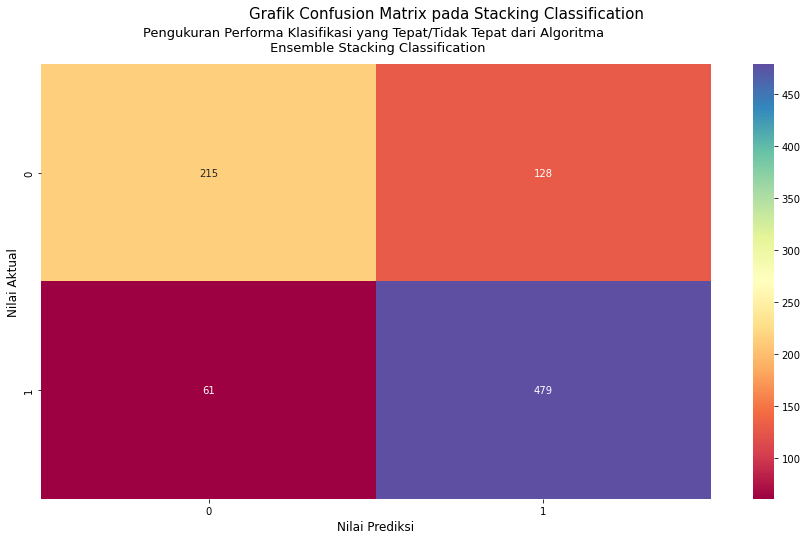

In [50]:
"""
Pengukuran performa melalui grafik confusion matrix atas hasil penggabungan 5 algoritma yang berbeda
dengan model klasifikasi Ensemble Stacking yang dibantu melalui sebuah model estimator final dari Algoritma SVM
"""
plt.figure(figsize=(15, 8))

sns.heatmap(confusion_matrix(y_test, pred_Ensemble_StackingClassifier), annot=True, cmap="Spectral", fmt=".0f")
plt.xlabel("Nilai Prediksi", fontsize=12)
plt.ylabel("Nilai Aktual", fontsize=12)
plt.suptitle("Grafik Confusion Matrix pada Stacking Classification", fontsize=15)
plt.title("Pengukuran Performa Klasifikasi yang Tepat/Tidak Tepat dari Algoritma \n Ensemble Stacking Classification",
          fontsize=13, pad=13, loc="center")
plt.savefig("../Data Visualization/Confusion Matrix/Confusion Matrix untuk Algoritma Ensemble Stacking Classification.png")
plt.show()

Berikut adalah penjelasan dari grafik confusion matrix berdasarkan pelatihan sekaligus pengujian menggunakan Algoritma Ensemble Stacking yang telah dilatih dengan data training dan diujikan menggunakan data testing. Perlu diketahui bahwa model Ensemble Stacking yang saya buat pada peneitian kali ini terdiri 5 Algoritma Machine Learning diantaranya adalah Regresi Logistik, Decision Tree, Support Vector Machine/SVM, K-Nearest Neighbors/KNN dan Naive Bayes. Kelima algoritma tersebut dapat dikatakan juga sebagai algoritma individual karena tidak dibangun melalui kumpulan-kumpulan Algoritma Machine Learning yang lain. Berbeda halnya dengan Algoritma Ensemble Stacking yang terdiri dari kumpulan Algoritma Machine Learning/Algoritma Random Forest yang terdiri dari 2/lebih Algoritma Decision Tree.

Hasil tersebut merupakan hasil klasifikasi/prediksi yang dilakukan oleh data testing yang dimana data testing berfungsi untuk menguji Ensemble Stacking dengan final estimator atau yang disebut sebagai Meta Classifier. Meta Classifier pada penelitian kali ini berupa Algoritma SVM karena sebelumnya algoritma tersebut memiliki akurasi tertinggi saat masih melakukan proses pengklasifikasian data dalam menentukan jenis perawatan untuk para pasien hanya menggunakan Algoritma SVM saja (Algoritma Individual). Berikut adalah penjelasan dari nilai-nilai pada grafik confusion matrix diatas:

1. Nilai 215 menunjukkan bahwa nilai tersebut adalah TRUE NEGATIVE (TN) yang merupakan data negatif yang berhasil di klasifikasikan dengan benar.
2. Nilai 479 menunjukkan bahwa nilai ini adalah TRUE POSITIVE (TP) yang merupakan data positif yang berhasil di klasifikasikan dengan benar.
4. Nilai 128 menunjukkan bahwa nilai tersebut merupakan FALSE POSITIVE (FP) yang merupakan data negatif namun diklasifikasikan/diprediksi sebagai hasil dari nilai yang positif.
4. Terakhir adalah nilai 61 yang menunjukkan bahwa nilai tersebut adalah FALSE NEGATIVE (FN) yang merupakan data positif namun diklasifikasikan/diprediksi sebagai hasil/output dari nilai negatif.

Sebagai catatan bahwa nilai 0 dan 1, baik yang ada di sumbu x (Nilai Prediksi) dan sumbu y (Nilai Aktual) adalah nilai negatif dan positif. Nilai negatif ditandai dengan angka 0 sedangkan nilai positif ditandai dengan angka 1. Untuk lebih jelasnya adalah seperti ini:

- 0: Nilai Negatif

- 1: Nilai Positif

Referensi:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

- https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [51]:
"""
Menampilkan performa berdasarkan nilai akurasi dari Algoritma Ensemble Stacking dengan
estimator final dari Algoritma SVM dengan hyperparameters bernilai default
"""
print("Nilai Akurasi dari Algoritma Ensemble Stacking adalah", accuracy_score(y_test, pred_Ensemble_StackingClassifier))

Nilai Akurasi dari Algoritma Ensemble Stacking adalah 0.7859569648924122


Berdasarkan hasil diatas telah diketahui bahwa final performance yang ditunjukkan oleh nilai akurasi dari Algoritma Ensemble Stacking setelah algoritma tersebut dilatih dan diuji dengan sekumpulan data training dan data testing menghasilkan performa kinerja yang sudah cukup bagus yaitu 0.7859569648924122 yang jika dibulatkan menjadi 0.79.

Itu artinya dengan proporsi persentase data pada saat proses split validation yang sebesar 80:20 dalam mengklasifikasikan nilai data dari kolom "Status" menggunakan Ensemble Stacking dapat kita ketahui bahwasanya mayoritas pengklasifikasian data dengan data baru (data testing) yang dilakukan oleh Naive Bayes sudah cukup baik walaupun sudah pasti dengan akurasi tersebut masih terdapat beberapa kelasahan dalam memprediksi data baru yang diberikan oleh data testing.

Nilai 0.7859569648924122 atau 0.79 didapatkan melalui perhitungan rumus dari TP + TN / TP + TN + FP + FN. TP merupakan singkatan dari TRUE POSITIVE, TN singkatan dari TRUE NEGATIVE, FP singkatan dari FALSE POSITIVE dan FN singkatan dari FALSE NEGATIVE. Berdasarkan rumus diatas maka didapatkan perhitungan nilai seperti ini:

479 (TP) + 215 (TN) / 479 (TP) + 215 (TN) + 128 (FP) + 61 (FN) = 694 / 883 = 0.7859569648924122 atau 0.79.

Referensi perhitungan dan rumus:

- https://www.analyticsvidhya.com/blog/2021/05/in-depth-understanding-of-confusion-matrix/

Selanjutnya saya akan menampilkan nilai menggunakan ketiga metrics klasifikasi yang lain yaitu precision, recall, dan f1_score.

In [53]:
"""
Menampilkan nilai presisi, recall, dan f1_score metrics secara keseluruhan (bukan didasari oleh dua nilai
data dari kolom "Status") berdasarkan hasil prediksi yang telah dilakukan oleh Ensemble Stacking dengan data testing
"""
print("--------------Nilai Presisi dari Algoritma Ensemble Stacking--------------")
print(precision_score(y_test, pred_Ensemble_StackingClassifier, average="weighted"), "\n")

print("--------------Nilai Recall dari Algoritma Ensemble Stacking--------------")
print(recall_score(y_test, pred_Ensemble_StackingClassifier, average="weighted"), "\n")

print("--------------Nilai F1_Score dari Algoritma Ensemble Stacking--------------")
print(f1_score(y_test, pred_Ensemble_StackingClassifier, average="weighted"))

--------------Nilai Presisi dari Algoritma Ensemble Stacking--------------
0.785187462977611 

--------------Nilai Recall dari Algoritma Ensemble Stacking--------------
0.7859569648924122 

--------------Nilai F1_Score dari Algoritma Ensemble Stacking--------------
0.7806245275233353


Hasil diatas menunjukkan nilai pada ketiga metrics yang biasa digunakan di dalam pengujian klasifikasi machine learning (selain accuracy) yaitu precision, recall, dan f1_score. Ketiga metrics nilai tersebut bukan menunjukkan berdasarkan data negatif/positif seperti yang ditunjukkan pada grafik confusion matrix melainkan perhitungan secara keseluruhan dari final performance pada Algoritma Ensemble Stacking dalam mengklasifikasikan data di dalam variabel dependen/variabel y.

Selain itu terdapat nilai average="weighted" pada precision_score, recall_score, dan f1_score. Nilai average="weighted" ini merupakan perhitungan metrik untuk setiap label/nilai data dengan menemukan pembobotan di nilai rata-rata dengan jumlah instance yang sebenarnya untuk setiap label data. Untuk melihat penjelasan lebih lengkap mengenai average="weighted" dapat dilihat melalui link berikut dan berfokus kepada Parameters:average:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Selanjutnya saya akan menampilkan semua metrics seperti accuracy, precision, recall dan f1-score dengan menggunakan fungsi classification_report dari SKLearn.

In [55]:
"""
Menampilkan final performance (akurasi, presisi, dll) dari Algoritma Ensemble Stacking yang berlandaskan 5 Algoritma
Indvidual Machine Learning yaitu Regresi Logistik, Decision Tree, SVM, KNN dan Naive Bayes dengan nilai
estimator dasar yang disebut juga sebagai Meta Classifier yang menggunakan Algoritma SVM dengan hyperparameters bernilai default
"""

print("-------------------Hasil Prediksi untuk Algoritma Ensemble Stacking-------------------")
print(classification_report(y_test, pred_Ensemble_StackingClassifier))

-------------------Hasil Prediksi untuk Algoritma Ensemble Stacking-------------------
              precision    recall  f1-score   support

           0       0.78      0.63      0.69       343
           1       0.79      0.89      0.84       540

    accuracy                           0.79       883
   macro avg       0.78      0.76      0.76       883
weighted avg       0.79      0.79      0.78       883



#### 3.7. Ensemble Voting Algorithm

In [60]:
"""
Membuat struktur model pengklasifikasian data dengan Ensemble Voting yang berdasarkan dari performa
Lima Algoritma Machine Learning diantaranya adalah Regresi Logistik (0.75), Decision Tree (0.76),
Support Vector Machine (0.78), K-Nearest Neighbors (0.75) dan Naive Bayes (0.71)
"""

VotingEnsemble_algorithm = VotingClassifier(estimators=[("Logistic Regression: ",
                                                         best_hyperparameters_LogisticRegression),
                                                        ("Decision Tree: ", best_hyperparameters_DecisionTree),
                                                        ("Support Vector Machine: ", best_hyperparameters_SVM),
                                                        ("K-Nearest Neighbors: ", best_hyperparameters_KNN),
                                                        ("Naive Bayes: ", best_hyperparameters_NaiveBayes)])

parameters_EnsembleVoting = {
    "voting": ["soft", "hard"],
    "flatten_transform": [True, False],
    "weights": [(1, 3, 5, 2, 1), (2, 3, 2, 3, 4), (4, 3, 4, 2, 2), (5, 3, 4, 2, 4), (5, 1, 5, 5, 4), (2, 4, 1, 3, 5)]
}

grid_search_EnsembleVoting = GridSearchCV(VotingEnsemble_algorithm, parameters_EnsembleVoting)
grid_search_EnsembleVoting.fit(x_train, y_train)

# Melihat nilai terbaik dari parameter-parameter yang telah didefinisikan di dalam variabel parameters_EnsembleVoting
print("Nilai Terbaik dari Parameter voting adalah: ",
      grid_search_EnsembleVoting.best_estimator_.get_params()["voting"])
print("Nilai Terbaik dari Parameter flatten_transform adalah: ",
      grid_search_EnsembleVoting.best_estimator_.get_params()["flatten_transform"])
print("Nilai Terbaik dari Parameter weights adalah: ",
      grid_search_EnsembleVoting.best_estimator_.get_params()["weights"])

Nilai Terbaik dari Parameter voting adalah:  hard
Nilai Terbaik dari Parameter flatten_transform adalah:  True
Nilai Terbaik dari Parameter weights adalah:  (1, 3, 5, 2, 1)


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter pada Algoritma Ensemble Voting, maka didapatkan beberapa hasil kesimpulan diantaranya adalah sebagai berikut:

1. Parameter pertama yang didefinisikan di dalam variabel parameters_EnsembleVoting adalah parameter voting itu sendiri yang memiliki 2 nilai yang didefinisikan yaitu hard dan soft. Dari kedua nilai tersebut ternyata nilai default yaitu hard yang digunakan dalam melatih Algoritma Ensemble Stacking dengan sekumpulan data training. Maka dari itu karena jenis voting yang digunakan adalah hard maka nilai pada output prediksi dilakukan dengan suara/jumlah data mayoritas dengan probabilitas tertinggi untuk diprediksi oleh masing-masing jenis klasifikasi pada nilai datanya. Sebagai contoh hasil pengklasifikasi memprediksi nilai data output yaitu 1, 0, 1, 0 dan 0. Karena nilai 0 merupakan nilai data dengan jumlah mayoritas maka mayoritas memprediksi angka 0 sebagai output prediksi sekaligus klasifikasinya dan karena hal tersebut nilai 0 akan menjadi hasil akhir dari prediksi yang dilakukan.

2. Parameter kedua setelah parameter voting yang didefinisikan di dalam variabel parameters_EnsembleStacking adalah parameter flatten_transform dengan 2 nilai boolean yaitu True dan False. Dari kedua nilai tersebut ternyata boolean True yang akan digunakan dalam melatih Algoritma Ensemble Voting.

3. Parameter terakhir yang saya definisikan di dalam parameters_EnsembleVoting adalah parameter weights yang telah didefinisikan 6 jenis tuple yang masing-masing di dalamnya terdapat perbedaan nilai yang telah didefinisikan. Nilai yang terpilih pada proses tuning hyperparameters di dalam Algoritma Ensemble Voting adalah tuple (1, 3, 5, 2, 1). Kelima nilai tersebut mewakili 5 base algoritma seperti Regresi Logistik, Decision Tree, SVM, KNN dan Naive Bayes. Kelima nilai tersebut yang ada di dalam tuple pada parameter weights berfungsi untuk memberi pembobotan terhadap label kelas data yang diprediksi menggunakan jenis voting hard.


Pada proses tuning hyperparameters atau dapat dikatakan sebagai proses pencarian nilai terbaik di dalam parameter-parameter dari suatu algoritma yang didefisinikan, Algoritma Ensemble Voting, saya juga menggunakan sebuah fungsi yang bernama GridSearchCV. GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari atau memvalidasi sebuah nilai terbaik (the best value in each parameters) dengan otomatis untuk setiap parameter-parameter dari Algoritma Machine Learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

- https://www.mygreatlearning.com/blog/gridsearchcv/

In [61]:
"""
Menampilkan struktur dari Algoritma Ensemble Voting yang akan dilatih
menggunakan sekumpulan data training (x_train dan y_train)
"""
VotingEnsemble_algorithm.fit(x_train, y_train)

VotingClassifier(estimators=[('Logistic Regression: ',
                              LogisticRegression(dual=True, max_iter=67,
                                                 random_state=23,
                                                 solver='liblinear', tol=1.2)),
                             ('Decision Tree: ',
                              DecisionTreeClassifier(max_depth=5,
                                                     max_leaf_nodes=26,
                                                     min_samples_leaf=17,
                                                     min_samples_split=20)),
                             ('Support Vector Machine: ', SVC(C=2.4)),
                             ('K-Nearest Neighbors: ',
                              KNeighborsClassifier(algorithm='brute',
                                                   leaf_size=2, n_neighbors=10,
                                                   weights='distance')),
                             ('Naive Bayes: ',
                              GaussianNB(var_smoothing=1.2589254117941673))])

Pada struktur diatas yang ditunjukkan oleh Algoritma Ensemble Voting kita dapat mengetahui sangat jelas bahwasanya struktur Ensemble Voting yang kita buat berlandaskan dari 5 Algoritma Machine Learning yang sebelumnya telah kita gunakan dan diprediksi menggunakan data testing. Sama seperti struktur Ensemble Stacking, pada Algoritma Ensemble Voting memiliki berbagai macam hyperparameters berserta nilai yang paling cocok untuk digunakan sebagai pelatihan algoritma. Selain itu kita dapat mengetahuinya secara langsung bahwa di dalam Algoritma Ensemble Voting tidak terdapat meta-classifier karena memang pada dasarnya Ensemble Voting tidak memiliki parameter yang nantinya akan digunakan sebagai fitur baru dalam menghasilkan suatu prediksi beserta klasifikasi terbaru.

In [62]:
# Mencetak/menampilkan hyperparameters yang dimiliki oleh variabel "grid_search_EnsembleVoting"
print(grid_search_EnsembleVoting.get_params())

{'cv': None, 'error_score': nan, 'estimator__estimators': [('Logistic Regression: ', LogisticRegression(dual=True, max_iter=67, random_state=23, solver='liblinear',
                   tol=1.2)), ('Decision Tree: ', DecisionTreeClassifier(max_depth=5, max_leaf_nodes=26, min_samples_leaf=17,
                       min_samples_split=20)), ('Support Vector Machine: ', SVC(C=2.4)), ('K-Nearest Neighbors: ', KNeighborsClassifier(algorithm='brute', leaf_size=2, n_neighbors=10,
                     weights='distance')), ('Naive Bayes: ', GaussianNB(var_smoothing=1.2589254117941673))], 'estimator__flatten_transform': True, 'estimator__n_jobs': None, 'estimator__verbose': False, 'estimator__voting': 'hard', 'estimator__weights': None, 'estimator__Logistic Regression: ': LogisticRegression(dual=True, max_iter=67, random_state=23, solver='liblinear',
                   tol=1.2), 'estimator__Decision Tree: ': DecisionTreeClassifier(max_depth=5, max_leaf_nodes=26, min_samples_leaf=17,
              

In [66]:
"""
Menguji sekaligus menampilkan hasil prediksi yang telah
dilakukan oleh Algoritma Ensemble Voting dengan data testing setelah
pada tahap sebelumnya telah dilakukan proses penggabungan 5 Algoritma Machine Learning
"""
print("----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Ensemble Voting----------")
pred_EnsembleVotingClassifier = grid_search_EnsembleVoting.predict(x_test)
print(pred_EnsembleVotingClassifier)

----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Ensemble Voting----------
[1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1
 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1
 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0
 0 1 1 

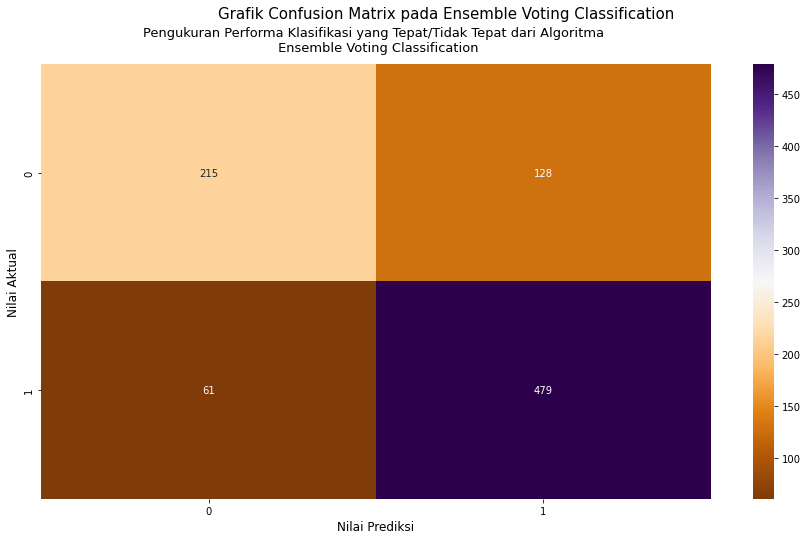

In [67]:
"""
Pengukuran performa melalui grafik confusion matrix atas hasil
penggabungan 5 algoritma mschine learning yang berbeda dengan model klasifikasi Ensemble Voting
"""
plt.figure(figsize=(15, 8))

sns.heatmap(confusion_matrix(y_test, pred_EnsembleVotingClassifier), annot=True, cmap="PuOr", fmt=".0f")
plt.xlabel("Nilai Prediksi", fontsize=12)
plt.ylabel("Nilai Aktual", fontsize=12)
plt.suptitle("Grafik Confusion Matrix pada Ensemble Voting Classification", fontsize=15)
plt.title("Pengukuran Performa Klasifikasi yang Tepat/Tidak Tepat dari Algoritma \n Ensemble Voting Classification",
          fontsize=13, pad=13, loc="center")
plt.savefig("../Data Visualization/Confusion Matrix/Confusion Matrix untuk Algoritma Ensemble Voting.png")
plt.show()

Berikut adalah penjelasan dari grafik confusion matrix berdasarkan pelatihan sekaligus pengujian menggunakan Algoritma Ensemble Voting yang telah dilatih dengan data training dan diujikan menggunakan data testing. Sama seperti struktur algoritma yang dimiliki oleh Ensemble Stacking, perlu diketahui bahwa model Ensemble Voting yang saya buat pada penelitian kali ini terdiri 5 Algoritma Machine Learning diantaranya adalah Regresi Logistik, Decision Tree, Support Vector Machine/SVM, K-Nearest Neighbors/KNN dan Naive Bayes.

Kelima algoritma tersebut dapat dikatakan juga sebagai algoritma individual (Base Algorithm) karena tidak dibangun melalui per 1 object Algoritma Machine Learning yang lain. Berbeda halnya dengan Algoritma Ensemble Voting yang terdiri dari kumpulan Algoritma Machine Learning yang merupakan gabungan lebih dari 1 algoritma. Berikut adalah penjelasan dari nilai-nilai pada grafik confusion matrix diatas:

1. Nilai 215 menunjukkan bahwa nilai tersebut adalah TRUE NEGATIVE (TN) yang merupakan data negatif yang berhasil di klasifikasikan dengan benar.
2. Nilai 479 menunjukkan bahwa nilai ini adalah TRUE POSITIVE (TP) yang merupakan data positif yang berhasil di klasifikasikan dengan benar.
4. Nilai 128 menunjukkan bahwa nilai tersebut merupakan FALSE POSITIVE (FP) yang merupakan data negatif namun diklasifikasikan/diprediksi sebagai hasil dari nilai yang positif.
4. Terakhir adalah nilai 61 yang menunjukkan bahwa nilai tersebut adalah FALSE NEGATIVE (FN) yang merupakan data positif namun diklasifikasikan/diprediksi sebagai hasil/output dari nilai negatif.

Sebagai catatan bahwa nilai 0 dan 1, baik yang ada di sumbu x (Nilai Prediksi) dan sumbu y (Nilai Aktual) adalah nilai negatif dan positif. Nilai negatif ditandai dengan angka 0 sedangkan nilai positif ditandai dengan angka 1. Untuk lebih jelasnya adalah seperti ini:

- 0: Nilai Negatif

- 1: Nilai Positif

Referensi:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

- https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [65]:
# Menampilkan performa berdasarkan nilai akurasi dari Algoritma Ensemble Voting
print("Nilai Akurasi dari Algoritma Ensemble Voting Classification adalah",
      accuracy_score(y_test, pred_EnsembleVotingClassifier))

Nilai Akurasi dari Algoritma Ensemble Voting Classification adalah 0.7859569648924122


Berdasarkan hasil diatas telah diketahui bahwa final performance yang ditunjukkan oleh nilai akurasi dari Algoritma Ensemble Stacking setelah algoritma tersebut dilatih dan diuji dengan sekumpulan data training dan data testing menghasilkan performa kinerja yang sudah cukup bagus yaitu 0.7859569648924122 yang jika dibulatkan menjadi 0.79.

Itu artinya dengan proporsi persentase data pada saat proses split validation yang sebesar 80:20 dalam mengklasifikasikan nilai data dari kolom "Status" menggunakan Ensemble Stacking dapat kita ketahui bahwasanya mayoritas pengklasifikasian data dengan data baru (data testing) yang dilakukan oleh Naive Bayes sudah cukup baik walaupun sudah pasti dengan akurasi tersebut masih terdapat beberapa kelasahan dalam memprediksi data baru yang diberikan oleh data testing.

Nilai 0.7859569648924122 atau 0.79 didapatkan melalui perhitungan rumus dari TP + TN / TP + TN + FP + FN. TP merupakan singkatan dari TRUE POSITIVE, TN singkatan dari TRUE NEGATIVE, FP singkatan dari FALSE POSITIVE dan FN singkatan dari FALSE NEGATIVE. Berdasarkan rumus diatas maka didapatkan perhitungan nilai seperti ini:

479 (TP) + 215 (TN) / 479 (TP) + 215 (TN) + 128 (FP) + 61 (FN) = 694 / 883 = 0.7859569648924122 atau 0.79.

Referensi perhitungan dan rumus:

- https://www.analyticsvidhya.com/blog/2021/05/in-depth-understanding-of-confusion-matrix/

Selanjutnya saya akan menampilkan nilai menggunakan ketiga metrics klasifikasi yang lain yaitu precision, recall, dan f1_score.

In [53]:
"""
Menampilkan nilai presisi, recall, dan f1_score metrics secara keseluruhan (bukan didasari oleh dua nilai
data dari kolom "Status") berdasarkan hasil prediksi yang telah dilakukan oleh Ensemble Stacking dengan data testing
"""
print("--------------Nilai Presisi dari Algoritma Ensemble Voting--------------")
print(precision_score(y_test, pred_Ensemble_StackingClassifier, average="weighted"), "\n")

print("--------------Nilai Recall dari Algoritma Ensemble Voting--------------")
print(recall_score(y_test, pred_Ensemble_StackingClassifier, average="weighted"), "\n")

print("--------------Nilai F1_Score dari Algoritma Ensemble Voting--------------")
print(f1_score(y_test, pred_Ensemble_StackingClassifier, average="weighted"))

--------------Nilai Presisi dari Algoritma Ensemble Stacking--------------
0.785187462977611 

--------------Nilai Recall dari Algoritma Ensemble Stacking--------------
0.7859569648924122 

--------------Nilai F1_Score dari Algoritma Ensemble Stacking--------------
0.7806245275233353


Hasil diatas menunjukkan nilai pada ketiga metrics yang biasa digunakan di dalam pengujian klasifikasi machine learning (selain accuracy) yaitu precision, recall, dan f1_score. Ketiga metrics nilai tersebut bukan menunjukkan berdasarkan data negatif/positif seperti yang ditunjukkan pada grafik confusion matrix melainkan perhitungan secara keseluruhan dari final performance pada Algoritma Ensemble Stacking dalam mengklasifikasikan data di dalam variabel dependen/variabel y.

Selain itu terdapat nilai average="weighted" pada precision_score, recall_score, dan f1_score. Nilai average="weighted" ini merupakan perhitungan metrik untuk setiap label/nilai data dengan menemukan pembobotan di nilai rata-rata dengan jumlah instance yang sebenarnya untuk setiap label data. Untuk melihat penjelasan lebih lengkap mengenai average="weighted" dapat dilihat melalui link berikut dan berfokus kepada Parameters:average:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Selanjutnya saya akan menampilkan semua metrics seperti accuracy, precision, recall dan f1-score dengan menggunakan fungsi classification_report dari SKLearn.

In [55]:
"""
Menampilkan final performance (akurasi, presisi, dll) dari Algoritma Ensemble Voting yang berlandaskan 5 Algoritma
indvidual/base Machine Learning yaitu Regresi Logistik, Decision Tree, SVM, KNN dan Naive Bayes dengan nilai
"""

print("-------------------Hasil Prediksi untuk Algoritma Ensemble Voting-------------------")
print(classification_report(y_test, pred_Ensemble_StackingClassifier))

-------------------Hasil Prediksi untuk Algoritma Ensemble Stacking-------------------
              precision    recall  f1-score   support

           0       0.78      0.63      0.69       343
           1       0.79      0.89      0.84       540

    accuracy                           0.79       883
   macro avg       0.78      0.76      0.76       883
weighted avg       0.79      0.79      0.78       883



In [154]:
"""
Menampilkan performa berdasarkan nilai akurasi dari Algoritma Ensemble Stacking dengan
estimator dasar dari Algoritma SVM dengan hyperparameters bernilai default
"""
print("Nilai Akurasi dari Algoritma Ensemble Stacking adalah", accuracy_score(y_test, pred_VotingClassifier))

Nilai Akurasi dari Algoritma Ensemble Stacking adalah 0.7723669309173273


In [155]:
print(classification_report(y_test, pred_VotingClassifier))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       343
           1       0.78      0.87      0.82       540

    accuracy                           0.77       883
   macro avg       0.77      0.74      0.75       883
weighted avg       0.77      0.77      0.77       883

